<a href="https://colab.research.google.com/github/AlexCoilaJrt/10algorimosandREDNEURONAL/blob/main/ExamenDataPer%C3%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion del Dataset

# Columnas principales:
# Columna	Descripción
- FEDERACION	Deporte o disciplina (Atletismo, Natación, etc.)
- EVENTO	Nombre del torneo o campeonato
- PAIS_EVENTO, CIUDAD_EVENTO	Lugar del evento
- FECHA_INICIO, FECHA_FIN	Fechas del evento
- DEPORTISTA	Nombre del atleta
- PUESTO	Posición o medalla obtenida
- ESPECIALIDAD	Tipo de prueba (Pista, Campo, etc.)
- COLECTIVO	Si fue individual o grupal
- DEPARTAMENTO, PROVINCIA, DISTRITO	Ubicación del deportista
- FECHA_PUBLICACION	Fecha del registro oficial

# Objetivo posible del análisis

Podrías querer, por ejemplo:

Predecir el puesto (rendimiento) de un deportista.

Analizar qué factores influyen en el éxito (país, federación, tipo de prueba).

Detectar grupos o patrones ocultos entre los deportistas o eventos.

### Modelos de Machine Learning Supervisados

In [2]:
# Instalar librerías necesarias
!pip install xgboost scikit-learn pandas numpy matplotlib seaborn plotly -q

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [6]:
with open('Data_DeportistasEventos.csv', 'r', encoding='latin-1') as f:
    for i in range(5):
        print(f.readline())


FECHA_CORTE;ITEM;FEDERACION;EVENTO;PAIS_EVENTO;CIUDAD_EVENTO;FECHA_INICIO;FECHA_FIN;DEPORTISTA;PUESTO;ESPECIALIDAD;COLECTIVO;DEPARTAMENTO;PROVINCIA;DISTRITO;UBIGEO;FECHA_PUBLICACION

20241212;1;ATLETISMO;XVI CAMPEONATO MUNDIAL JUVENIL 2014;ESTADOS UNIDOS;EUGENE;20140722;20140727;ANGOMA ZUÑIGA DANIEL;33;PISTA;Individual;Lima;Lima;Lima;150101;20241212

20241212;2;ATLETISMO;CAMPEONATO PANAMERICANO DE PRUEBAS COMBINADAS;CANADA;OTTAWA;20140717;20140719;ARANA CHIESA MELISSA MARIELLA;19;COMBINADA;Individual;Lima;Lima;Lima;150101;20241212

20241212;3;ATLETISMO;XVI CAMPEONATO MUNDIAL JUVENIL 2014;ESTADOS UNIDOS;EUGENE;20140722;20140727;ARENAS HUACASI ZULEMA KATIA;6;PISTA;Individual;Lima;Lima;Lima;150101;20241212

20241212;4;ATLETISMO;XVI CAMPEONATO MUNDIAL JUVENIL 2014;ESTADOS UNIDOS;EUGENE;20140722;20140727;BASILIO PEREZ LUCY;26;PISTA;Individual;Lima;Lima;Lima;150101;20241212



In [7]:
# Cargar el dataset correctamente
df = pd.read_csv(
    'Data_DeportistasEventos.csv',
    sep=';',              # separador correcto
    encoding='latin-1',   # para manejar tildes y ñ
    on_bad_lines='skip'   # salta líneas con errores de formato
)

print("📊 Dataset cargado exitosamente!")
print(f"   - Filas: {df.shape[0]:,}")
print(f"   - Columnas: {df.shape[1]}")
print("\n🔍 Primeras filas:")
display(df.head())

📊 Dataset cargado exitosamente!
   - Filas: 47,622
   - Columnas: 17

🔍 Primeras filas:


,FECHA_CORTE,ITEM,FEDERACION,EVENTO,PAIS_EVENTO,CIUDAD_EVENTO,FECHA_INICIO,FECHA_FIN,DEPORTISTA,PUESTO,ESPECIALIDAD,COLECTIVO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_PUBLICACION
0,20241212,1,ATLETISMO,XVI CAMPEONATO MUNDIAL JUVENIL 2014,ESTADOS UNIDOS,EUGENE,20140722,20140727,ANGOMA ZUÑIGA DANIEL,33,PISTA,Individual,Lima,Lima,Lima,150101,20241212
1,20241212,2,ATLETISMO,CAMPEONATO PANAMERICANO DE PRUEBAS COMBINADAS,CANADA,OTTAWA,20140717,20140719,ARANA CHIESA MELISSA MARIELLA,19,COMBINADA,Individual,Lima,Lima,Lima,150101,20241212
2,20241212,3,ATLETISMO,XVI CAMPEONATO MUNDIAL JUVENIL 2014,ESTADOS UNIDOS,EUGENE,20140722,20140727,ARENAS HUACASI ZULEMA KATIA,6,PISTA,Individual,Lima,Lima,Lima,150101,20241212
3,20241212,4,ATLETISMO,XVI CAMPEONATO MUNDIAL JUVENIL 2014,ESTADOS UNIDOS,EUGENE,20140722,20140727,BASILIO PEREZ LUCY,26,PISTA,Individual,Lima,Lima,Lima,150101,20241212
4,20241212,5,ATLETISMO,XVI CAMPEONATO MUNDIAL JUVENIL 2014,ESTADOS UNIDOS,EUGENE,20140722,20140727,BAZALAR ALAVA DIANA CAROLINA,16,PISTA,Individual,Lima,Lima,Lima,150101,20241212


# Exploración Inicial y Análisis

In [8]:
# ============================================
# PASO 2: EXPLORACIÓN INICIAL
# ============================================

print("=" * 60)
print("📋 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
df.info()

📋 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47622 entries, 0 to 47621
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FECHA_CORTE        47622 non-null  int64 
 1   ITEM               47622 non-null  int64 
 2   FEDERACION         47622 non-null  object
 3   EVENTO             47622 non-null  object
 4   PAIS_EVENTO        47622 non-null  object
 5   CIUDAD_EVENTO      47622 non-null  object
 6   FECHA_INICIO       47622 non-null  int64 
 7   FECHA_FIN          47622 non-null  int64 
 8   DEPORTISTA         47622 non-null  object
 9   PUESTO             47622 non-null  object
 10  ESPECIALIDAD       47622 non-null  object
 11  COLECTIVO          47351 non-null  object
 12  DEPARTAMENTO       47622 non-null  object
 13  PROVINCIA          47622 non-null  object
 14  DISTRITO           47622 non-null  object
 15  UBIGEO             47622 non-null  int64 
 16  FECHA_

In [9]:
# Revisar valores nulos
print("\n" + "=" * 60)
print("🔍 VALORES NULOS POR COLUMNA")
print("=" * 60)

nulos = df.isnull().sum()
nulos_pct = (df.isnull().sum() / len(df)) * 100
resumen_nulos = pd.DataFrame({
    'Valores Nulos': nulos,
    'Porcentaje (%)': nulos_pct
}).sort_values('Porcentaje (%)', ascending=False)

print(resumen_nulos[resumen_nulos['Valores Nulos'] > 0])


🔍 VALORES NULOS POR COLUMNA
           Valores Nulos  Porcentaje (%)
COLECTIVO            271        0.569065


In [10]:
# Análisis de la columna PUESTO (nuestra variable objetivo)
print("\n" + "=" * 60)
print("🎯 ANÁLISIS DE LA COLUMNA 'PUESTO'")
print("=" * 60)

if 'PUESTO' in df.columns:
    print(f"\nValores únicos en PUESTO: {df['PUESTO'].nunique()}")
    print(f"\nTop 20 valores más frecuentes:")
    print(df['PUESTO'].value_counts().head(20))
else:
    print("⚠️ La columna 'PUESTO' no existe. Verificar nombre de columna.")


🎯 ANÁLISIS DE LA COLUMNA 'PUESTO'

Valores únicos en PUESTO: 101

Top 20 valores más frecuentes:
PUESTO
BRONCE       6327
4            4959
5            4746
PLATA        4729
ORO          4660
PARTICIPÓ    3756
6            2878
7            2304
9            2006
8            1979
10            803
11            744
12            665
16            657
17            580
13            525
14            494
15            357
18            301
19            243
Name: count, dtype: int64


# Limpieza y Transformación de Datos

In [11]:
# ============================================
# PASO 3: LIMPIEZA DE DATOS
# ============================================

# Crear una copia para trabajar
df_clean = df.copy()

print("🧼 INICIANDO LIMPIEZA DE DATOS...")
print("=" * 60)

# 3.1 - Limpiar columna PUESTO (variable objetivo)
print("\n1️⃣ Limpiando columna PUESTO...")

# Convertir a string y limpiar
df_clean['PUESTO'] = df_clean['PUESTO'].astype(str).str.strip().str.upper()

# Función para categorizar el puesto
def categorizar_puesto(puesto):
    """
    Categoriza el puesto en: Medalla, Top_8, Participante
    """
    if pd.isna(puesto) or puesto == 'NAN' or puesto == '':
        return 'Participante'

    puesto = str(puesto).upper()

    # Medallas
    medallas = ['1°', '1', 'PRIMERO', 'ORO', 'GOLD', 'MEDALLA DE ORO',
                '2°', '2', 'SEGUNDO', 'PLATA', 'SILVER', 'MEDALLA DE PLATA',
                '3°', '3', 'TERCERO', 'BRONCE', 'BRONZE', 'MEDALLA DE BRONCE']

    if any(med in puesto for med in medallas):
        return 'Medalla'

    # Top 8
    top_8 = ['4°', '4', 'CUARTO', '5°', '5', 'QUINTO',
             '6°', '6', 'SEXTO', '7°', '7', 'SÉPTIMO', 'SEPTIMO',
             '8°', '8', 'OCTAVO', 'FINALISTA', 'FINAL']

    if any(top in puesto for top in top_8):
        return 'Top_8'

    return 'Participante'

# Aplicar categorización
df_clean['CATEGORIA_RENDIMIENTO'] = df_clean['PUESTO'].apply(categorizar_puesto)

print(f"   ✅ Columna 'CATEGORIA_RENDIMIENTO' creada")
print(f"\n   Distribución de categorías:")
print(df_clean['CATEGORIA_RENDIMIENTO'].value_counts())
print(f"\n   Porcentaje:")
print(df_clean['CATEGORIA_RENDIMIENTO'].value_counts(normalize=True) * 100)

🧼 INICIANDO LIMPIEZA DE DATOS...

1️⃣ Limpiando columna PUESTO...
   ✅ Columna 'CATEGORIA_RENDIMIENTO' creada

   Distribución de categorías:
CATEGORIA_RENDIMIENTO
Medalla         24175
Top_8           17669
Participante     5778
Name: count, dtype: int64

   Porcentaje:
CATEGORIA_RENDIMIENTO
Medalla         50.764353
Top_8           37.102600
Participante    12.133048
Name: proportion, dtype: float64


In [12]:
# 3.2 - Limpiar columnas de fechas
print("\n2️⃣ Procesando fechas...")

# Convertir fechas
df_clean['FECHA_INICIO'] = pd.to_datetime(df_clean['FECHA_INICIO'], errors='coerce')
df_clean['FECHA_FIN'] = pd.to_datetime(df_clean['FECHA_FIN'], errors='coerce')

# Extraer características temporales
df_clean['AÑO_EVENTO'] = df_clean['FECHA_INICIO'].dt.year
df_clean['MES_EVENTO'] = df_clean['FECHA_INICIO'].dt.month
df_clean['DURACION_DIAS'] = (df_clean['FECHA_FIN'] - df_clean['FECHA_INICIO']).dt.days

# Llenar valores nulos con la mediana
df_clean['DURACION_DIAS'].fillna(df_clean['DURACION_DIAS'].median(), inplace=True)

print(f"   ✅ Fechas procesadas")
print(f"   - Rango de años: {df_clean['AÑO_EVENTO'].min():.0f} - {df_clean['AÑO_EVENTO'].max():.0f}")


2️⃣ Procesando fechas...
   ✅ Fechas procesadas
   - Rango de años: 1970 - 1970


In [13]:
# 3.3 - Agrupar PAIS_EVENTO por continente/región
print("\n3️⃣ Agrupando países por región...")

def agrupar_pais(pais):
    """
    Agrupa países por región geográfica
    """
    if pd.isna(pais):
        return 'Desconocido'

    pais = str(pais).upper()

    # Sudamérica
    sudamerica = ['PERÚ', 'PERU', 'BRASIL', 'BRAZIL', 'ARGENTINA', 'CHILE',
                  'COLOMBIA', 'ECUADOR', 'VENEZUELA', 'BOLIVIA', 'PARAGUAY',
                  'URUGUAY', 'GUYANA', 'SURINAM']
    if any(p in pais for p in sudamerica):
        return 'Sudamérica'

    # Norteamérica
    norteamerica = ['ESTADOS UNIDOS', 'USA', 'MÉXICO', 'MEXICO', 'CANADÁ',
                    'CANADA', 'COSTA RICA', 'PANAMÁ', 'GUATEMALA']
    if any(p in pais for p in norteamerica):
        return 'Norteamérica'

    # Europa
    europa = ['ESPAÑA', 'FRANCIA', 'ALEMANIA', 'ITALIA', 'INGLATERRA',
              'PORTUGAL', 'RUSIA', 'SUIZA', 'AUSTRIA', 'BÉLGICA', 'HOLANDA',
              'REINO UNIDO', 'POLONIA', 'GRECIA']
    if any(p in pais for p in europa):
        return 'Europa'

    # Asia
    asia = ['CHINA', 'JAPÓN', 'JAPON', 'COREA', 'INDIA', 'TAILANDIA',
            'VIETNAM', 'INDONESIA', 'FILIPINAS']
    if any(p in pais for p in asia):
        return 'Asia'

    return 'Otros'

df_clean['REGION_EVENTO'] = df_clean['PAIS_EVENTO'].apply(agrupar_pais)

print(f"   ✅ Países agrupados por región")
print(f"\n   Distribución:")
print(df_clean['REGION_EVENTO'].value_counts())


3️⃣ Agrupando países por región...
   ✅ Países agrupados por región

   Distribución:
REGION_EVENTO
Sudamérica      35777
Norteamérica     5067
Otros            4060
Europa           2024
Asia              694
Name: count, dtype: int64


In [14]:
# 3.4 - Agrupar EVENTO por tipo
print("\n4️⃣ Categorizando tipos de eventos...")

def categorizar_evento(evento):
    """
    Categoriza el tipo de evento deportivo
    """
    if pd.isna(evento):
        return 'Otros'

    evento = str(evento).upper()

    if any(x in evento for x in ['OLIMPICO', 'OLYMPIC', 'OLÍMPICO']):
        return 'Juegos_Olímpicos'
    elif any(x in evento for x in ['PANAMERICANO', 'PANAM']):
        return 'Panamericanos'
    elif any(x in evento for x in ['SUDAMERICANO', 'SURAMERICANO', 'SOUTH AMERICAN']):
        return 'Sudamericanos'
    elif any(x in evento for x in ['MUNDIAL', 'WORLD', 'CHAMPIONSHIP']):
        return 'Mundial'
    elif any(x in evento for x in ['COPA', 'CUP']):
        return 'Copa'
    else:
        return 'Otros'

df_clean['TIPO_EVENTO'] = df_clean['EVENTO'].apply(categorizar_evento)

print(f"   ✅ Eventos categorizados")
print(f"\n   Distribución:")
print(df_clean['TIPO_EVENTO'].value_counts())


4️⃣ Categorizando tipos de eventos...
   ✅ Eventos categorizados

   Distribución:
TIPO_EVENTO
Otros               13833
Sudamericanos       13446
Panamericanos        9224
Mundial              6597
Copa                 4198
Juegos_Olímpicos      324
Name: count, dtype: int64


In [15]:
# 3.5 - Convertir COLECTIVO a binario
print("\n5️⃣ Procesando columna COLECTIVO...")

if 'COLECTIVO' in df_clean.columns:
    df_clean['ES_COLECTIVO'] = df_clean['COLECTIVO'].apply(
        lambda x: 1 if str(x).upper() in ['SÍ', 'SI', 'S', '1', 'TRUE'] else 0
    )
    print(f"   ✅ Columna ES_COLECTIVO creada (0=Individual, 1=Colectivo)")
    print(f"\n   Distribución:")
    print(df_clean['ES_COLECTIVO'].value_counts())


5️⃣ Procesando columna COLECTIVO...
   ✅ Columna ES_COLECTIVO creada (0=Individual, 1=Colectivo)

   Distribución:
ES_COLECTIVO
0    47622
Name: count, dtype: int64


In [16]:
# 3.6 - Agrupar DEPARTAMENTO por región
print("\n6️⃣ Agrupando departamentos por región del Perú...")

def agrupar_region_peru(departamento):
    """
    Agrupa departamentos peruanos por región
    """
    if pd.isna(departamento):
        return 'Desconocido'

    dep = str(departamento).upper()

    costa = ['LIMA', 'CALLAO', 'ICA', 'AREQUIPA', 'MOQUEGUA', 'TACNA',
             'TUMBES', 'PIURA', 'LAMBAYEQUE', 'LA LIBERTAD', 'ANCASH']
    sierra = ['CUSCO', 'PUNO', 'AYACUCHO', 'HUANCAVELICA', 'APURÍMAC',
              'JUNÍN', 'PASCO', 'HUÁNUCO', 'CAJAMARCA']
    selva = ['LORETO', 'UCAYALI', 'MADRE DE DIOS', 'SAN MARTÍN', 'AMAZONAS']

    if any(d in dep for d in costa):
        return 'Costa'
    elif any(d in dep for d in sierra):
        return 'Sierra'
    elif any(d in dep for d in selva):
        return 'Selva'
    else:
        return 'Desconocido'

df_clean['REGION_PERU'] = df_clean['DEPARTAMENTO'].apply(agrupar_region_peru)

print(f"   ✅ Departamentos agrupados por región")
print(f"\n   Distribución:")
print(df_clean['REGION_PERU'].value_counts())


6️⃣ Agrupando departamentos por región del Perú...
   ✅ Departamentos agrupados por región

   Distribución:
REGION_PERU
Costa    47622
Name: count, dtype: int64


In [17]:
# 3.7 - Resumen final de limpieza
print("\n" + "=" * 60)
print("✅ LIMPIEZA COMPLETADA")
print("=" * 60)
print(f"\n📊 Dataset limpio:")
print(f"   - Filas: {df_clean.shape[0]:,}")
print(f"   - Columnas: {df_clean.shape[1]}")
print(f"\n🆕 Nuevas columnas creadas:")
nuevas_cols = ['CATEGORIA_RENDIMIENTO', 'AÑO_EVENTO', 'MES_EVENTO',
               'DURACION_DIAS', 'REGION_EVENTO', 'TIPO_EVENTO',
               'ES_COLECTIVO', 'REGION_PERU']
for col in nuevas_cols:
    if col in df_clean.columns:
        print(f"   ✓ {col}")


✅ LIMPIEZA COMPLETADA

📊 Dataset limpio:
   - Filas: 47,622
   - Columnas: 25

🆕 Nuevas columnas creadas:
   ✓ CATEGORIA_RENDIMIENTO
   ✓ AÑO_EVENTO
   ✓ MES_EVENTO
   ✓ DURACION_DIAS
   ✓ REGION_EVENTO
   ✓ TIPO_EVENTO
   ✓ ES_COLECTIVO
   ✓ REGION_PERU


# Visualización de Datos Limpios

📊 GENERANDO VISUALIZACIONES...


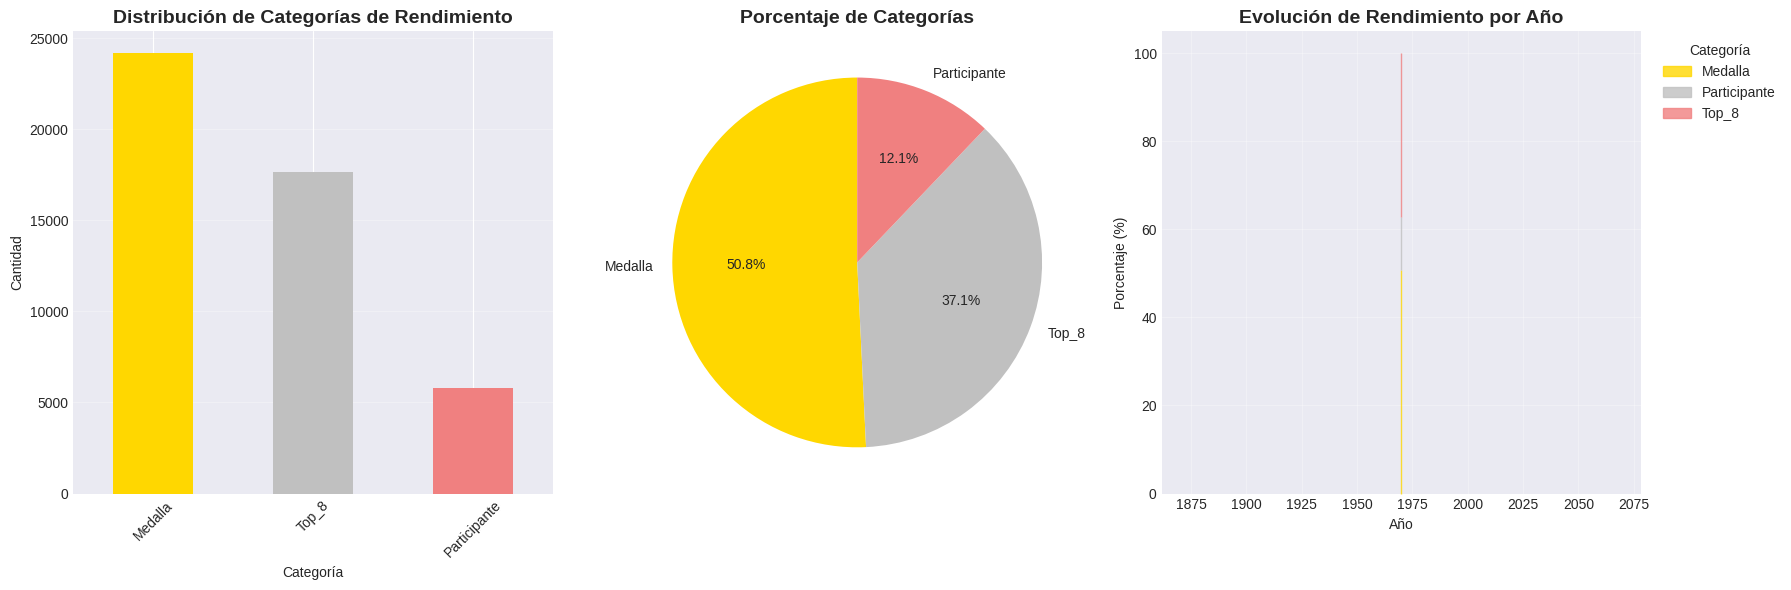

✅ Gráfico 1: Distribución de variable objetivo generado correctamente


In [19]:
# ============================================
# PASO 4: VISUALIZACIONES EXPLORATORIAS
# ============================================

print("📊 GENERANDO VISUALIZACIONES...")

# Crear figura y ejes (3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- Gráfico 1: Conteo ---
df_clean['CATEGORIA_RENDIMIENTO'].value_counts().plot(
    kind='bar',
    color=['gold', 'silver', 'lightcoral'],
    ax=axes[0]
)
axes[0].set_title('Distribución de Categorías de Rendimiento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Cantidad')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# --- Gráfico 2: Porcentaje (pie) ---
data_pie = df_clean['CATEGORIA_RENDIMIENTO'].value_counts()
axes[1].pie(
    data_pie,
    labels=data_pie.index,
    autopct='%1.1f%%',
    colors=['gold', 'silver', 'lightcoral'],
    startangle=90
)
axes[1].set_title('Porcentaje de Categorías', fontsize=14, fontweight='bold')

# --- Gráfico 3: Evolución por Año ---
rendimiento_año = pd.crosstab(df_clean['AÑO_EVENTO'], df_clean['CATEGORIA_RENDIMIENTO'], normalize='index') * 100
rendimiento_año.plot(
    kind='area',
    stacked=True,
    alpha=0.8,
    color=['gold', 'silver', 'lightcoral'],
    ax=axes[2]
)
axes[2].set_title('Evolución de Rendimiento por Año', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Año')
axes[2].set_ylabel('Porcentaje (%)')
axes[2].legend(title='Categoría', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[2].grid(alpha=0.3)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar
plt.show()

print("✅ Gráfico 1: Distribución de variable objetivo generado correctamente")

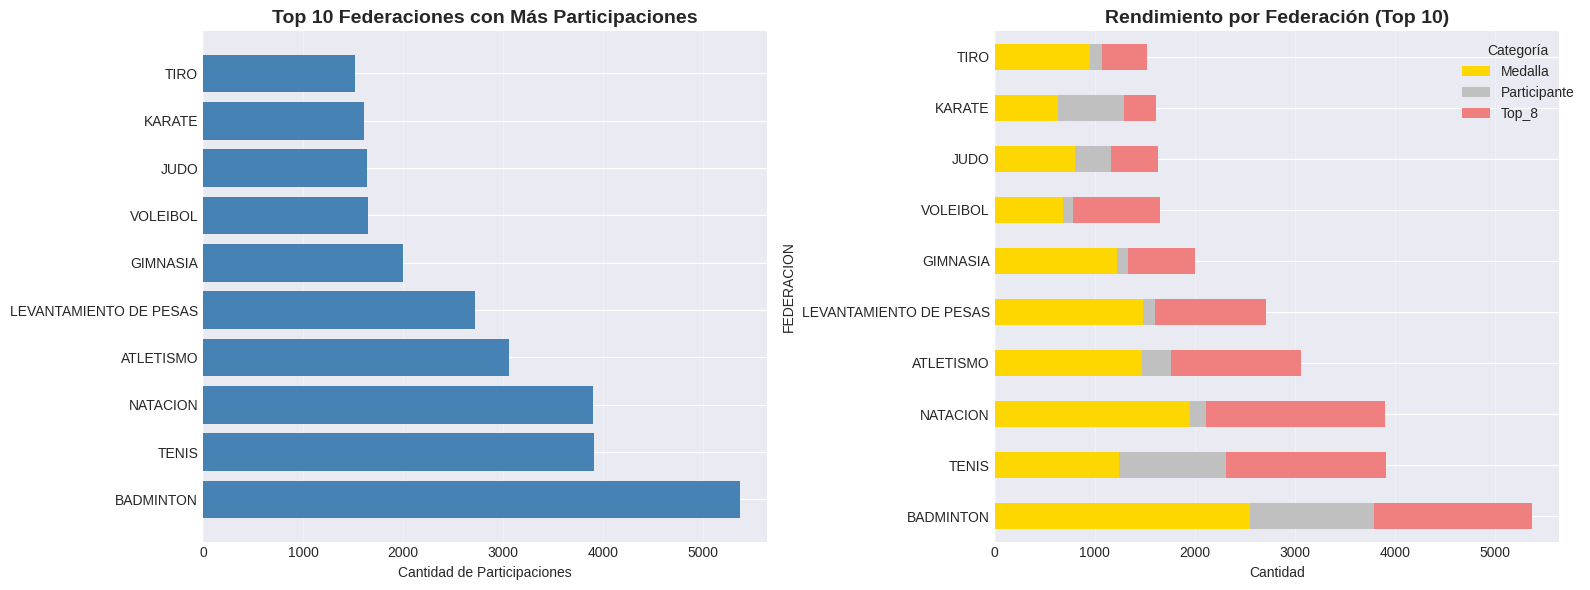

✅ Gráfico 2: Análisis por Federación generado


In [20]:
# 4.2 - Análisis por Federación (Top 10)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 federaciones con más participaciones
top_federaciones = df_clean['FEDERACION'].value_counts().head(10)
axes[0].barh(range(len(top_federaciones)), top_federaciones.values, color='steelblue')
axes[0].set_yticks(range(len(top_federaciones)))
axes[0].set_yticklabels(top_federaciones.index)
axes[0].set_xlabel('Cantidad de Participaciones')
axes[0].set_title('Top 10 Federaciones con Más Participaciones', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Rendimiento por federación (Top 10)
top_fed_medallas = df_clean[df_clean['FEDERACION'].isin(top_federaciones.index)]
rendimiento_fed = pd.crosstab(top_fed_medallas['FEDERACION'],
                               top_fed_medallas['CATEGORIA_RENDIMIENTO'])
rendimiento_fed = rendimiento_fed.loc[top_federaciones.index]
rendimiento_fed.plot(kind='barh', stacked=True, ax=axes[1],
                     color=['gold', 'silver', 'lightcoral'])
axes[1].set_xlabel('Cantidad')
axes[1].set_title('Rendimiento por Federación (Top 10)', fontsize=14, fontweight='bold')
axes[1].legend(title='Categoría', bbox_to_anchor=(1.05, 1))
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Gráfico 2: Análisis por Federación generado")

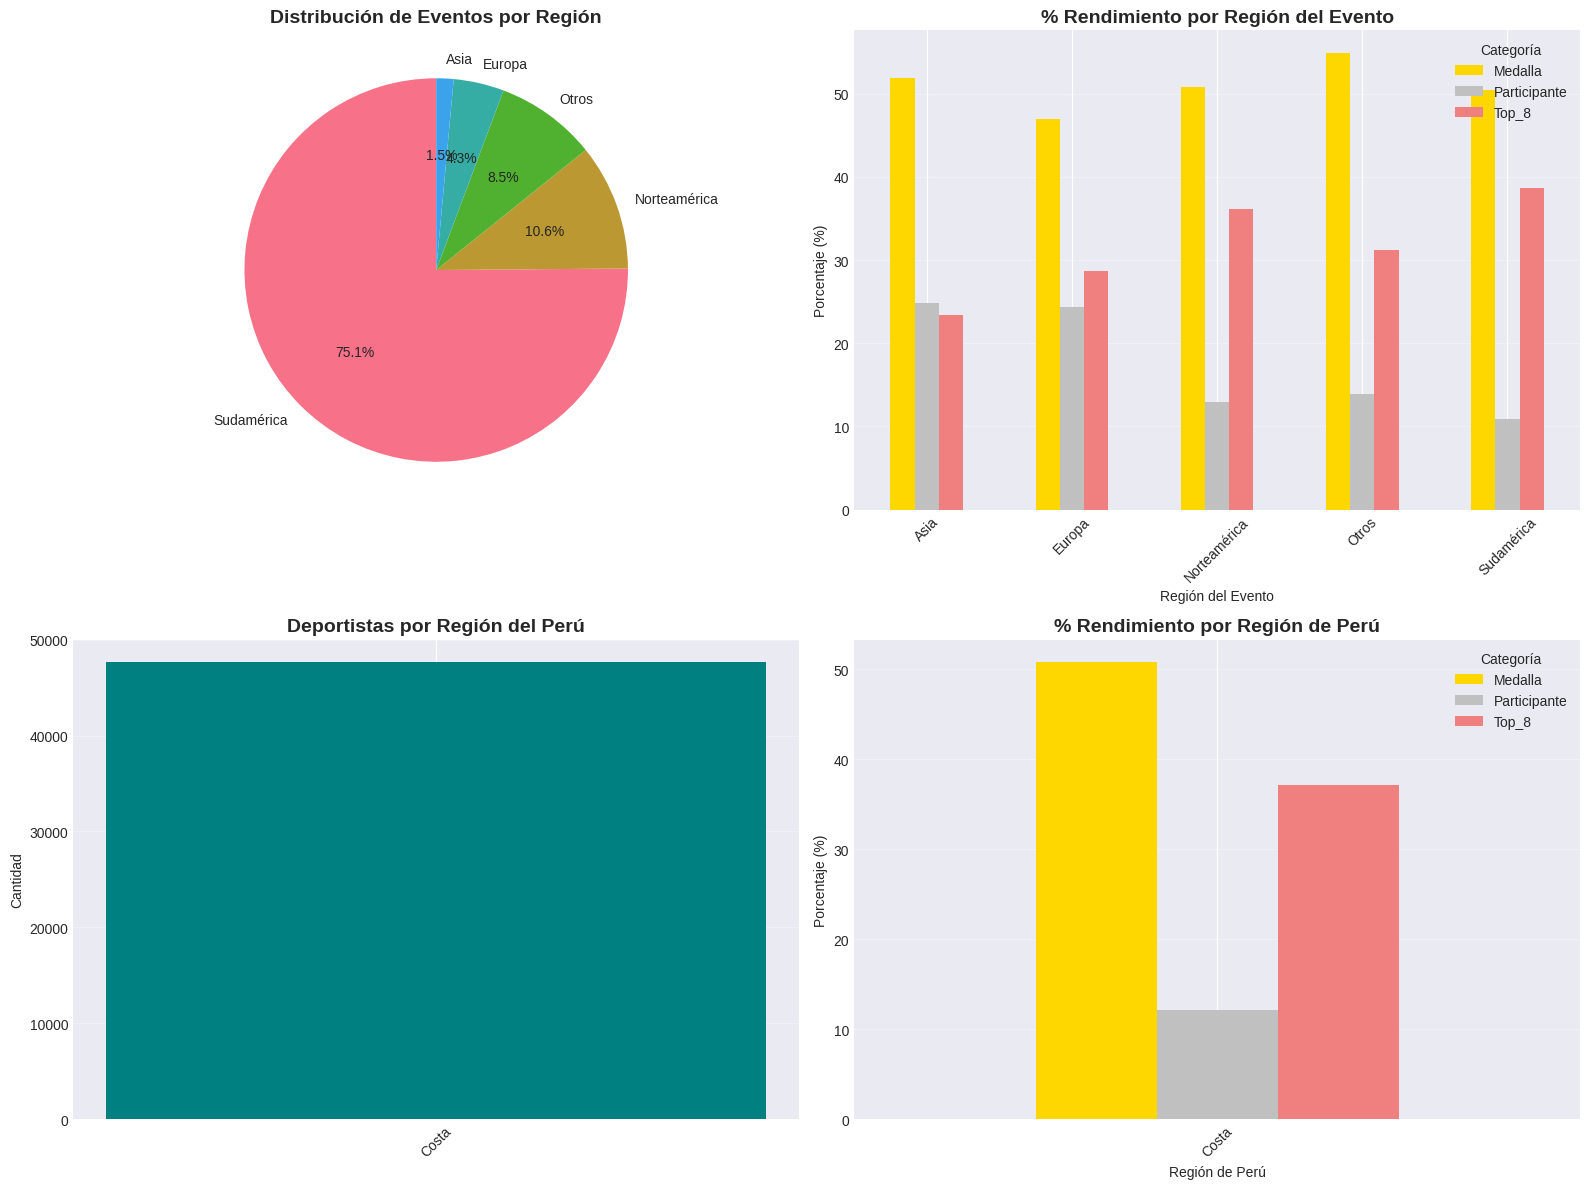

✅ Gráfico 3: Análisis geográfico generado


In [21]:
# 4.3 - Análisis geográfico
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Región del evento
region_counts = df_clean['REGION_EVENTO'].value_counts()
axes[0, 0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribución de Eventos por Región', fontsize=14, fontweight='bold')

# Rendimiento por región de evento
rendimiento_region = pd.crosstab(df_clean['REGION_EVENTO'],
                                  df_clean['CATEGORIA_RENDIMIENTO'],
                                  normalize='index') * 100
rendimiento_region.plot(kind='bar', ax=axes[0, 1], color=['gold', 'silver', 'lightcoral'])
axes[0, 1].set_title('% Rendimiento por Región del Evento', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Región del Evento')
axes[0, 1].set_ylabel('Porcentaje (%)')
axes[0, 1].legend(title='Categoría')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Región de Perú
region_peru = df_clean['REGION_PERU'].value_counts()
axes[1, 0].bar(range(len(region_peru)), region_peru.values, color='teal')
axes[1, 0].set_xticks(range(len(region_peru)))
axes[1, 0].set_xticklabels(region_peru.index, rotation=45)
axes[1, 0].set_title('Deportistas por Región del Perú', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].grid(axis='y', alpha=0.3)

# Rendimiento por región de Perú
rendimiento_peru = pd.crosstab(df_clean['REGION_PERU'],
                                df_clean['CATEGORIA_RENDIMIENTO'],
                                normalize='index') * 100
rendimiento_peru.plot(kind='bar', ax=axes[1, 1], color=['gold', 'silver', 'lightcoral'])
axes[1, 1].set_title('% Rendimiento por Región de Perú', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Región de Perú')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].legend(title='Categoría')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Gráfico 3: Análisis geográfico generado")

📊 GENERANDO ANÁLISIS TEMPORAL...


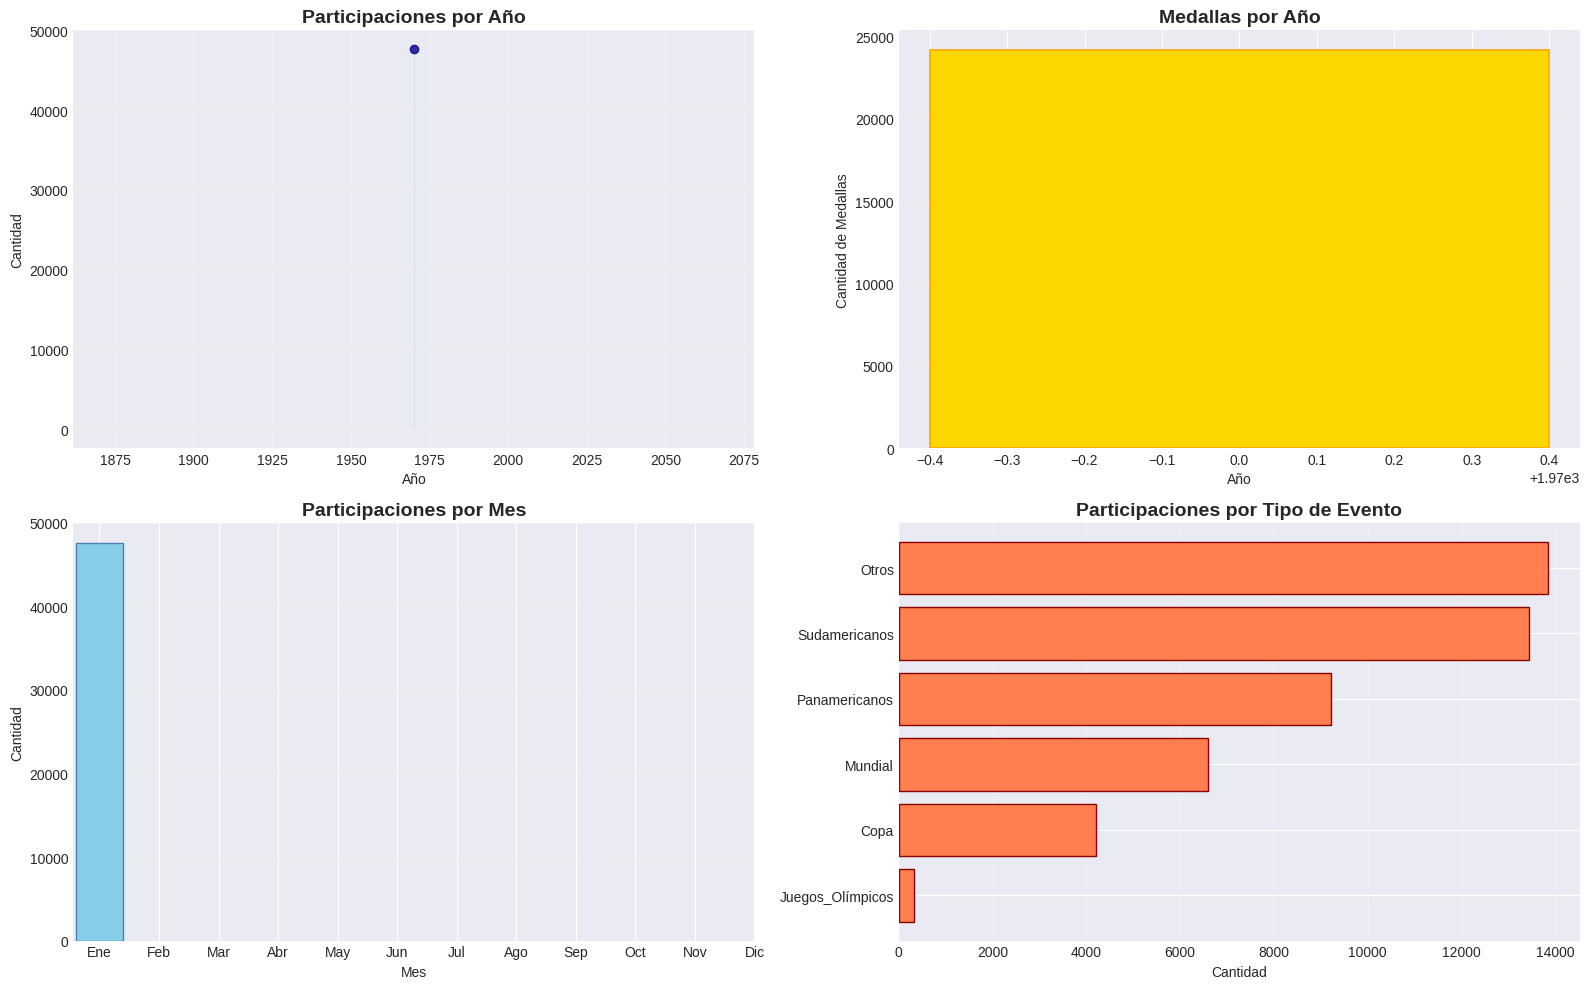

✅ Gráfico 4: Análisis temporal generado correctamente


In [23]:
# ============================================
# PASO 4.4 - ANÁLISIS TEMPORAL (CORREGIDO)
# ============================================

print("📊 GENERANDO ANÁLISIS TEMPORAL...")

# Convertir columnas a tipo numérico para asegurar el orden correcto
df_clean['AÑO_EVENTO'] = pd.to_numeric(df_clean['AÑO_EVENTO'], errors='coerce')
df_clean['MES_EVENTO'] = pd.to_numeric(df_clean['MES_EVENTO'], errors='coerce')

# Crear figura con 4 subgráficos bien distribuidos
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# =============================
# 1️⃣ Participaciones por Año
# =============================
participaciones_año = df_clean['AÑO_EVENTO'].value_counts().sort_index()

axes[0, 0].plot(
    participaciones_año.index,
    participaciones_año.values,
    marker='o',
    linewidth=2,
    color='darkblue',
    alpha=0.8
)
axes[0, 0].fill_between(
    participaciones_año.index,
    participaciones_año.values,
    color='lightblue',
    alpha=0.3
)
axes[0, 0].set_title('Participaciones por Año', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].grid(alpha=0.3)

# =============================
# 2️⃣ Medallas por Año
# =============================
medallas_año = (
    df_clean[df_clean['CATEGORIA_RENDIMIENTO'] == 'Medalla']
    .groupby('AÑO_EVENTO')
    .size()
)

axes[0, 1].bar(
    medallas_año.index,
    medallas_año.values,
    color='gold',
    edgecolor='orange',
    linewidth=1.2
)
axes[0, 1].set_title('Medallas por Año', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Cantidad de Medallas')
axes[0, 1].grid(axis='y', alpha=0.3)

# =============================
# 3️⃣ Participaciones por Mes
# =============================
# Asegurar que solo existan meses válidos (1-12)
df_meses = df_clean[df_clean['MES_EVENTO'].between(1, 12, inclusive='both')]
mes_counts = df_meses['MES_EVENTO'].value_counts().sort_index()
meses_labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

axes[1, 0].bar(
    mes_counts.index,
    mes_counts.values,
    color='skyblue',
    edgecolor='steelblue'
)
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(meses_labels)
axes[1, 0].set_title('Participaciones por Mes', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].grid(axis='y', alpha=0.3)

# =============================
# 4️⃣ Participaciones por Tipo de Evento
# =============================
tipo_evento = df_clean['TIPO_EVENTO'].value_counts().sort_values()

axes[1, 1].barh(
    tipo_evento.index,
    tipo_evento.values,
    color='coral',
    edgecolor='darkred'
)
axes[1, 1].set_title('Participaciones por Tipo de Evento', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Cantidad')
axes[1, 1].grid(axis='x', alpha=0.3)

# =============================
# Ajustes finales
# =============================
plt.tight_layout()
plt.show()

print("✅ Gráfico 4: Análisis temporal generado correctamente")

# Preparación de Datos para Modelado

In [24]:
# ============================================
# PASO 5: PREPARACIÓN PARA MACHINE LEARNING
# ============================================

print("🎯 PREPARANDO DATOS PARA MODELADO...")
print("=" * 60)

# 5.1 - Seleccionar características (features) relevantes
features_categoricas = [
    'FEDERACION',
    'REGION_EVENTO',
    'TIPO_EVENTO',
    'ESPECIALIDAD',
    'REGION_PERU'
]

features_numericas = [
    'AÑO_EVENTO',
    'MES_EVENTO',
    'DURACION_DIAS',
    'ES_COLECTIVO'
]

# Variable objetivo
target = 'CATEGORIA_RENDIMIENTO'

# Crear dataset para modelado
df_model = df_clean[features_categoricas + features_numericas + [target]].copy()

print(f"\n1️⃣ Features seleccionadas:")
print(f"   - Categóricas: {len(features_categoricas)}")
print(f"   - Numéricas: {len(features_numericas)}")
print(f"   - Total features: {len(features_categoricas) + len(features_numericas)}")

🎯 PREPARANDO DATOS PARA MODELADO...

1️⃣ Features seleccionadas:
   - Categóricas: 5
   - Numéricas: 4
   - Total features: 9


In [25]:
# 5.2 - Eliminar filas con valores nulos
print(f"\n2️⃣ Limpiando valores nulos...")
print(f"   - Filas antes: {len(df_model):,}")

df_model = df_model.dropna()

print(f"   - Filas después: {len(df_model):,}")
print(f"   - Filas eliminadas: {len(df_clean) - len(df_model):,}")


2️⃣ Limpiando valores nulos...
   - Filas antes: 47,622
   - Filas después: 47,622
   - Filas eliminadas: 0


In [26]:
# 5.3 - Encoding de variables categóricas
from sklearn.preprocessing import LabelEncoder

print(f"\n3️⃣ Aplicando Label Encoding a variables categóricas...")

label_encoders = {}

for col in features_categoricas:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    print(f"   ✓ {col}: {len(le.classes_)} categorías únicas")

print(f"\n   ✅ Encoding completado")


3️⃣ Aplicando Label Encoding a variables categóricas...
   ✓ FEDERACION: 57 categorías únicas
   ✓ REGION_EVENTO: 5 categorías únicas
   ✓ TIPO_EVENTO: 6 categorías únicas
   ✓ ESPECIALIDAD: 330 categorías únicas
   ✓ REGION_PERU: 1 categorías únicas

   ✅ Encoding completado


In [27]:
# 5.4 - Encoding de variable objetivo
print(f"\n4️⃣ Encoding de variable objetivo...")

le_target = LabelEncoder()
df_model['CATEGORIA_RENDIMIENTO_ENCODED'] = le_target.fit_transform(df_model[target])

# Mostrar mapeo
print(f"\n   Mapeo de categorías:")
for i, clase in enumerate(le_target.classes_):
    print(f"   {i} → {clase}")

print(f"\n   ✅ Variable objetivo codificada")


4️⃣ Encoding de variable objetivo...

   Mapeo de categorías:
   0 → Medalla
   1 → Participante
   2 → Top_8

   ✅ Variable objetivo codificada


In [28]:
# 5.5 - Dividir en features (X) y target (y)
X = df_model[features_categoricas + features_numericas]
y = df_model['CATEGORIA_RENDIMIENTO_ENCODED']

print(f"\n5️⃣ Dataset final para modelado:")
print(f"   - X (features): {X.shape}")
print(f"   - y (target): {y.shape}")
print(f"\n   Distribución de clases:")
for i, clase in enumerate(le_target.classes_):
    count = (y == i).sum()
    pct = (count / len(y)) * 100
    print(f"   {clase}: {count:,} ({pct:.2f}%)")


5️⃣ Dataset final para modelado:
   - X (features): (47622, 9)
   - y (target): (47622,)

   Distribución de clases:
   Medalla: 24,175 (50.76%)
   Participante: 5,778 (12.13%)
   Top_8: 17,669 (37.10%)


In [29]:
# 5.6 - Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n6️⃣ División de datos:")
print(f"   - Conjunto de entrenamiento: {X_train.shape[0]:,} ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"   - Conjunto de prueba: {X_test.shape[0]:,} ({(X_test.shape[0]/len(X))*100:.1f}%)")

print(f"\n✅ DATOS PREPARADOS PARA MODELADO")
print("=" * 60)


6️⃣ División de datos:
   - Conjunto de entrenamiento: 38,097 (80.0%)
   - Conjunto de prueba: 9,525 (20.0%)

✅ DATOS PREPARADOS PARA MODELADO


# Regresión Logística Multinomial

🤖 MODELO 1: REGRESIÓN LOGÍSTICA MULTINOMIAL + SMOTE (BALANCEADO)

1️⃣ Escalando los datos...
   ✅ Escalado completado correctamente

2️⃣ Aplicando SMOTE para balancear las clases...
   ✅ Nuevas proporciones de clases:
CATEGORIA_RENDIMIENTO_ENCODED
2    19340
0    19340
1    19340
Name: count, dtype: int64

3️⃣ Entrenando Regresión Logística balanceada...
   ✅ Entrenamiento completado en 0.21 segundos

4️⃣ Realizando predicciones...

5️⃣ Evaluación del modelo:

📊 ACCURACY GENERAL: 0.3134 (31.34%)

📋 REPORTE DE CLASIFICACIÓN (Conjunto de Prueba):
              precision    recall  f1-score   support

     Medalla     0.5224    0.1328    0.2117      4835
Participante     0.1571    0.5026    0.2393      1156
       Top_8     0.3833    0.4986    0.4334      3534

    accuracy                         0.3134      9525
   macro avg     0.3542    0.3780    0.2948      9525
weighted avg     0.4264    0.3134    0.2973      9525



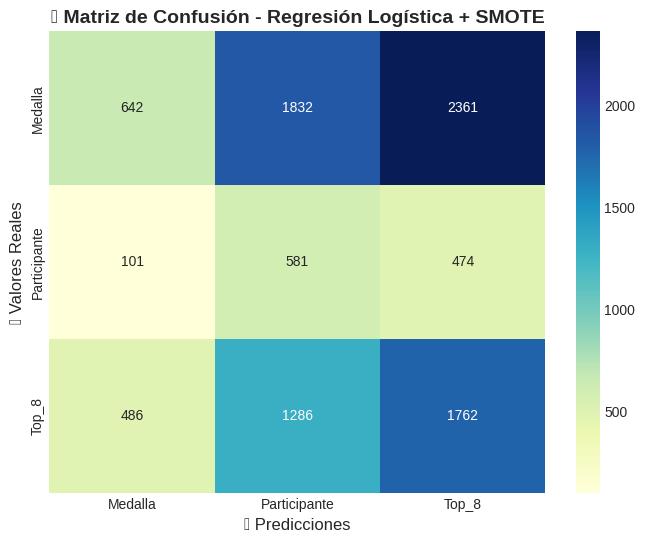


✅ Modelo finalizado correctamente (con balanceo SMOTE).


In [35]:
# ============================================
# PASO 6 (MEJORADO): REGRESIÓN LOGÍSTICA + SMOTE
# ============================================

print("🤖 MODELO 1: REGRESIÓN LOGÍSTICA MULTINOMIAL + SMOTE (BALANCEADO)")
print("=" * 70)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import time

# ============================================
# 1️⃣ ESCALADO DE DATOS
# ============================================
print("\n1️⃣ Escalando los datos...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✅ Escalado completado correctamente")

# ============================================
# 2️⃣ BALANCEO DE CLASES CON SMOTE
# ============================================
print("\n2️⃣ Aplicando SMOTE para balancear las clases...")
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
print(f"   ✅ Nuevas proporciones de clases:\n{y_train_bal.value_counts()}")

# ============================================
# 3️⃣ ENTRENAMIENTO DEL MODELO
# ============================================
print("\n3️⃣ Entrenando Regresión Logística balanceada...")
start_time = time.time()

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_bal, y_train_bal)
training_time = time.time() - start_time
print(f"   ✅ Entrenamiento completado en {training_time:.2f} segundos")

# ============================================
# 4️⃣ PREDICCIONES
# ============================================
print("\n4️⃣ Realizando predicciones...")
y_pred_test_lr = log_reg.predict(X_test_scaled)

# ============================================
# 5️⃣ MÉTRICAS DE DESEMPEÑO
# ============================================
print("\n5️⃣ Evaluación del modelo:")

test_acc_lr = accuracy_score(y_test, y_pred_test_lr)
print(f"\n📊 ACCURACY GENERAL: {test_acc_lr:.4f} ({test_acc_lr*100:.2f}%)")

print("\n📋 REPORTE DE CLASIFICACIÓN (Conjunto de Prueba):")
print("=" * 70)
print(classification_report(y_test, y_pred_test_lr,
                            target_names=le_target.classes_,
                            digits=4))

# ============================================
# 6️⃣ MATRIZ DE CONFUSIÓN
# ============================================
cm_lr = confusion_matrix(y_test, y_pred_test_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr,
            annot=True,
            fmt='d',
            cmap='YlGnBu',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title("📊 Matriz de Confusión - Regresión Logística + SMOTE", fontsize=14, fontweight='bold')
plt.xlabel("🔹 Predicciones", fontsize=12)
plt.ylabel("🔸 Valores Reales", fontsize=12)
plt.show()

print("\n✅ Modelo finalizado correctamente (con balanceo SMOTE).")



5️⃣ Generando visualizaciones del modelo de Regresión Logística...


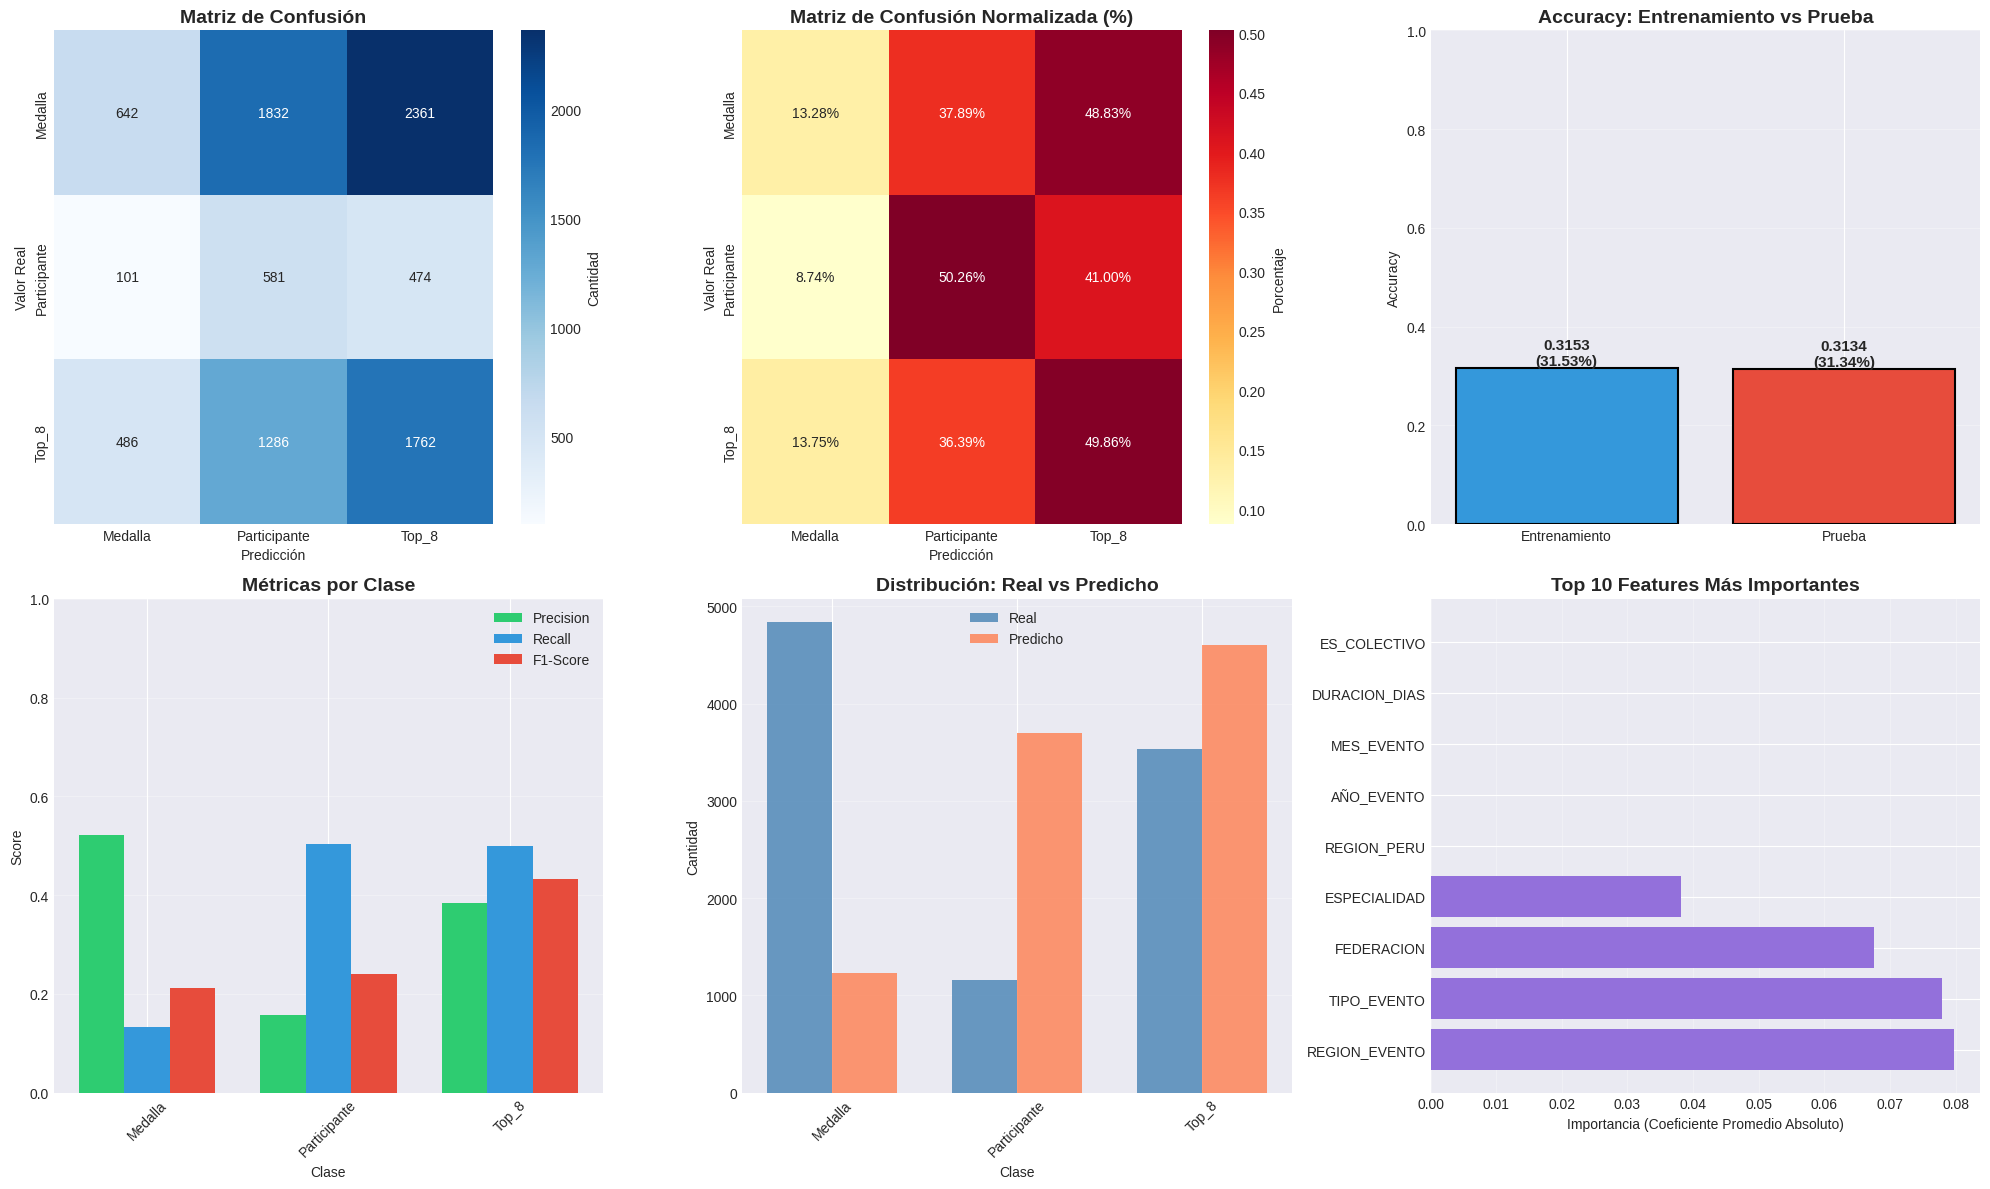

✅ Visualizaciones completas del modelo de Regresión Logística generadas


In [67]:
# 5️⃣ Visualizaciones del Modelo 1 - Regresión Logística
print("\n5️⃣ Generando visualizaciones del modelo de Regresión Logística...")

fig = plt.figure(figsize=(20, 12))

# Gráfico 1: Matriz de Confusión
plt.subplot(2, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Cantidad'})
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Gráfico 2: Matriz de Confusión Normalizada
plt.subplot(2, 3, 2)
cm_lr_norm = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_lr_norm, annot=True, fmt='.2%', cmap='YlOrRd',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Porcentaje'})
plt.title('Matriz de Confusión Normalizada (%)', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Gráfico 3: Comparación Train vs Test Accuracy
plt.subplot(2, 3, 3)
accuracies = [train_acc_lr, test_acc_lr]
labels = ['Entrenamiento', 'Prueba']
colors = ['#3498db', '#e74c3c']
bars = plt.bar(labels, accuracies, color=colors, edgecolor='black', linewidth=1.5)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy: Entrenamiento vs Prueba', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}\n({height*100:.2f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico 4: Métricas por Clase (Precision, Recall, F1)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test_lr)
plt.subplot(2, 3, 4)
x_pos = np.arange(len(le_target.classes_))
width = 0.25
plt.bar(x_pos - width, precision, width, label='Precision', color='#2ecc71')
plt.bar(x_pos, recall, width, label='Recall', color='#3498db')
plt.bar(x_pos + width, f1, width, label='F1-Score', color='#e74c3c')
plt.xlabel('Clase')
plt.ylabel('Score')
plt.title('Métricas por Clase', fontsize=14, fontweight='bold')
plt.xticks(x_pos, le_target.classes_, rotation=45)
plt.legend()
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Gráfico 5: Distribución de Predicciones
plt.subplot(2, 3, 5)
pred_counts = pd.Series(y_pred_test_lr).value_counts().sort_index()
real_counts = pd.Series(y_test).value_counts().sort_index()
x_pos = np.arange(len(le_target.classes_))
width = 0.35
plt.bar(x_pos - width/2, real_counts.values, width, label='Real', color='steelblue', alpha=0.8)
plt.bar(x_pos + width/2, pred_counts.values, width, label='Predicho', color='coral', alpha=0.8)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución: Real vs Predicho', fontsize=14, fontweight='bold')
plt.xticks(x_pos, le_target.classes_, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Gráfico 6: Coeficientes del modelo (Top 10 features)
plt.subplot(2, 3, 6)
coef_avg = np.abs(log_reg.coef_).mean(axis=0)
feature_importance_lr = pd.DataFrame({
    'feature': features_categoricas + features_numericas,
    'importance': coef_avg
}).sort_values('importance', ascending=False).head(10)
plt.barh(range(len(feature_importance_lr)), feature_importance_lr['importance'].values,
         color='mediumpurple')
plt.yticks(range(len(feature_importance_lr)), feature_importance_lr['feature'].values)
plt.xlabel('Importancia (Coeficiente Promedio Absoluto)')
plt.title('Top 10 Features Más Importantes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizaciones completas del modelo de Regresión Logística generadas")


# MODELO 2 - Random Forest Classifier

In [38]:
# ============================================
# PASO 7: MODELO 2 - RANDOM FOREST
# ============================================

print("\n🌲 MODELO 2: RANDOM FOREST CLASSIFIER")
print("=" * 60)

from sklearn.ensemble import RandomForestClassifier
import time

# Entrenar modelo
print("\n1️⃣ Entrenando Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,        # Número de árboles
    max_depth=20,            # Profundidad máxima
    min_samples_split=10,    # Mínimo de muestras para dividir
    min_samples_leaf=5,      # Mínimo de muestras en hoja
    random_state=42,
    n_jobs=-1,               # Usar todos los cores
    verbose=0
)

rf_model.fit(X_train, y_train)
training_time_rf = time.time() - start_time

print(f"   ✅ Entrenamiento completado en {training_time_rf:.2f} segundos")

# Predicciones
print("\n2️⃣ Realizando predicciones...")
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Métricas
print("\n3️⃣ Evaluación del modelo:")
print("\n📊 ACCURACY:")
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"   - Entrenamiento: {train_acc_rf:.4f} ({train_acc_rf*100:.2f}%)")
print(f"   - Prueba: {test_acc_rf:.4f} ({test_acc_rf*100:.2f}%)")

print("\n📋 REPORTE DE CLASIFICACIÓN (Conjunto de Prueba):")
print("=" * 60)
print(classification_report(y_test, y_pred_test_rf,
                          target_names=le_target.classes_,
                          digits=4))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
print("\n📊 MATRIZ DE CONFUSIÓN:")
print(cm_rf)


🌲 MODELO 2: RANDOM FOREST CLASSIFIER

1️⃣ Entrenando Random Forest...
   ✅ Entrenamiento completado en 1.73 segundos

2️⃣ Realizando predicciones...

3️⃣ Evaluación del modelo:

📊 ACCURACY:
   - Entrenamiento: 0.6215 (62.15%)
   - Prueba: 0.6006 (60.06%)

📋 REPORTE DE CLASIFICACIÓN (Conjunto de Prueba):
              precision    recall  f1-score   support

     Medalla     0.6113    0.8068    0.6956      4835
Participante     0.5309    0.2526    0.3423      1156
       Top_8     0.5893    0.4324    0.4988      3534

    accuracy                         0.6006      9525
   macro avg     0.5771    0.4973    0.5122      9525
weighted avg     0.5933    0.6006    0.5797      9525


📊 MATRIZ DE CONFUSIÓN:
[[3901  132  802]
 [ 601  292  263]
 [1880  126 1528]]


In [39]:
# 4️⃣ Feature Importance
print("\n4️⃣ Importancia de Features...")

feature_importance_rf = pd.DataFrame({
    'feature': features_categoricas + features_numericas,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 10 Features Más Importantes:")
print(feature_importance_rf.head(10).to_string(index=False))


4️⃣ Importancia de Features...

📊 Top 10 Features Más Importantes:
      feature  importance
 ESPECIALIDAD    0.456397
   FEDERACION    0.348153
  TIPO_EVENTO    0.121154
REGION_EVENTO    0.074296
  REGION_PERU    0.000000
   AÑO_EVENTO    0.000000
   MES_EVENTO    0.000000
DURACION_DIAS    0.000000
 ES_COLECTIVO    0.000000



5️⃣ Generando visualizaciones...


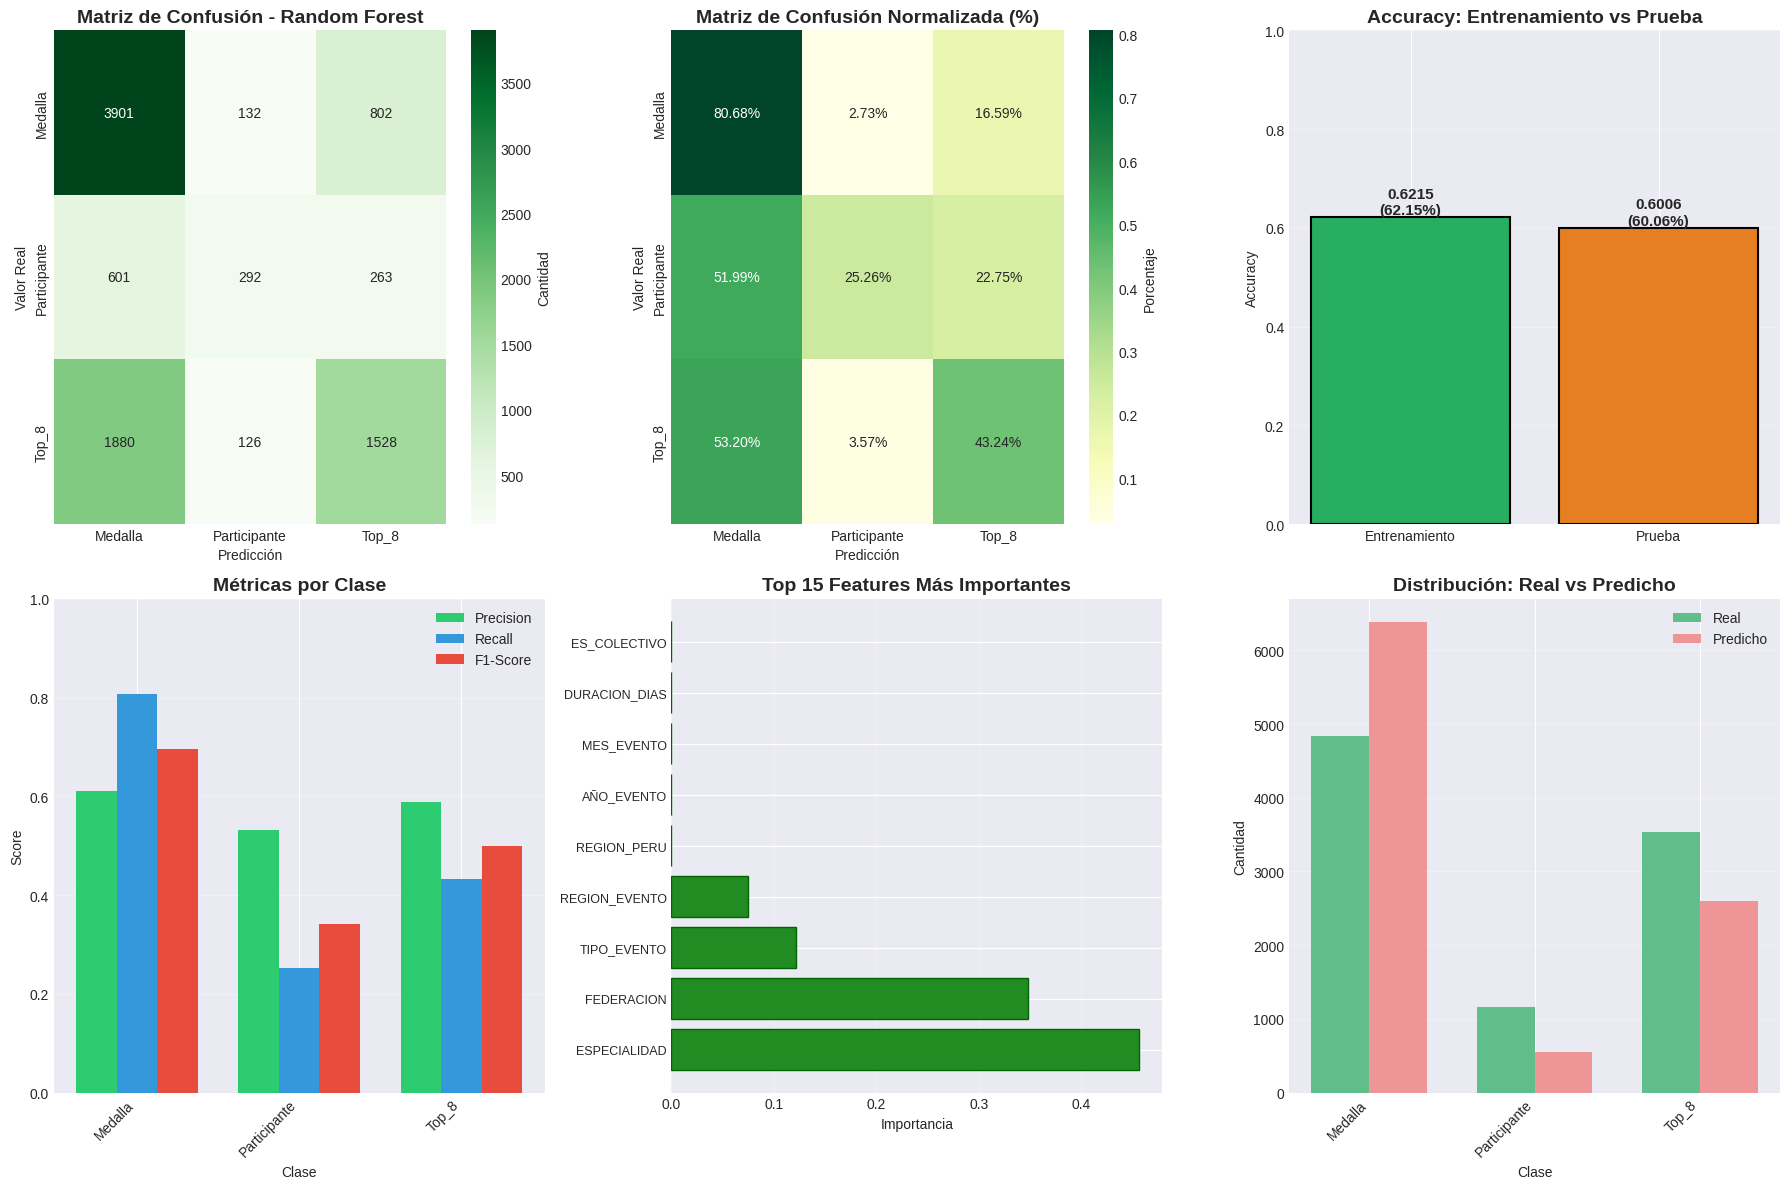

✅ Visualizaciones del Modelo 2 generadas

🌳 Generando visualización del árbol de Random Forest...

📍 Generando árbol completo (puede tardar un momento)...


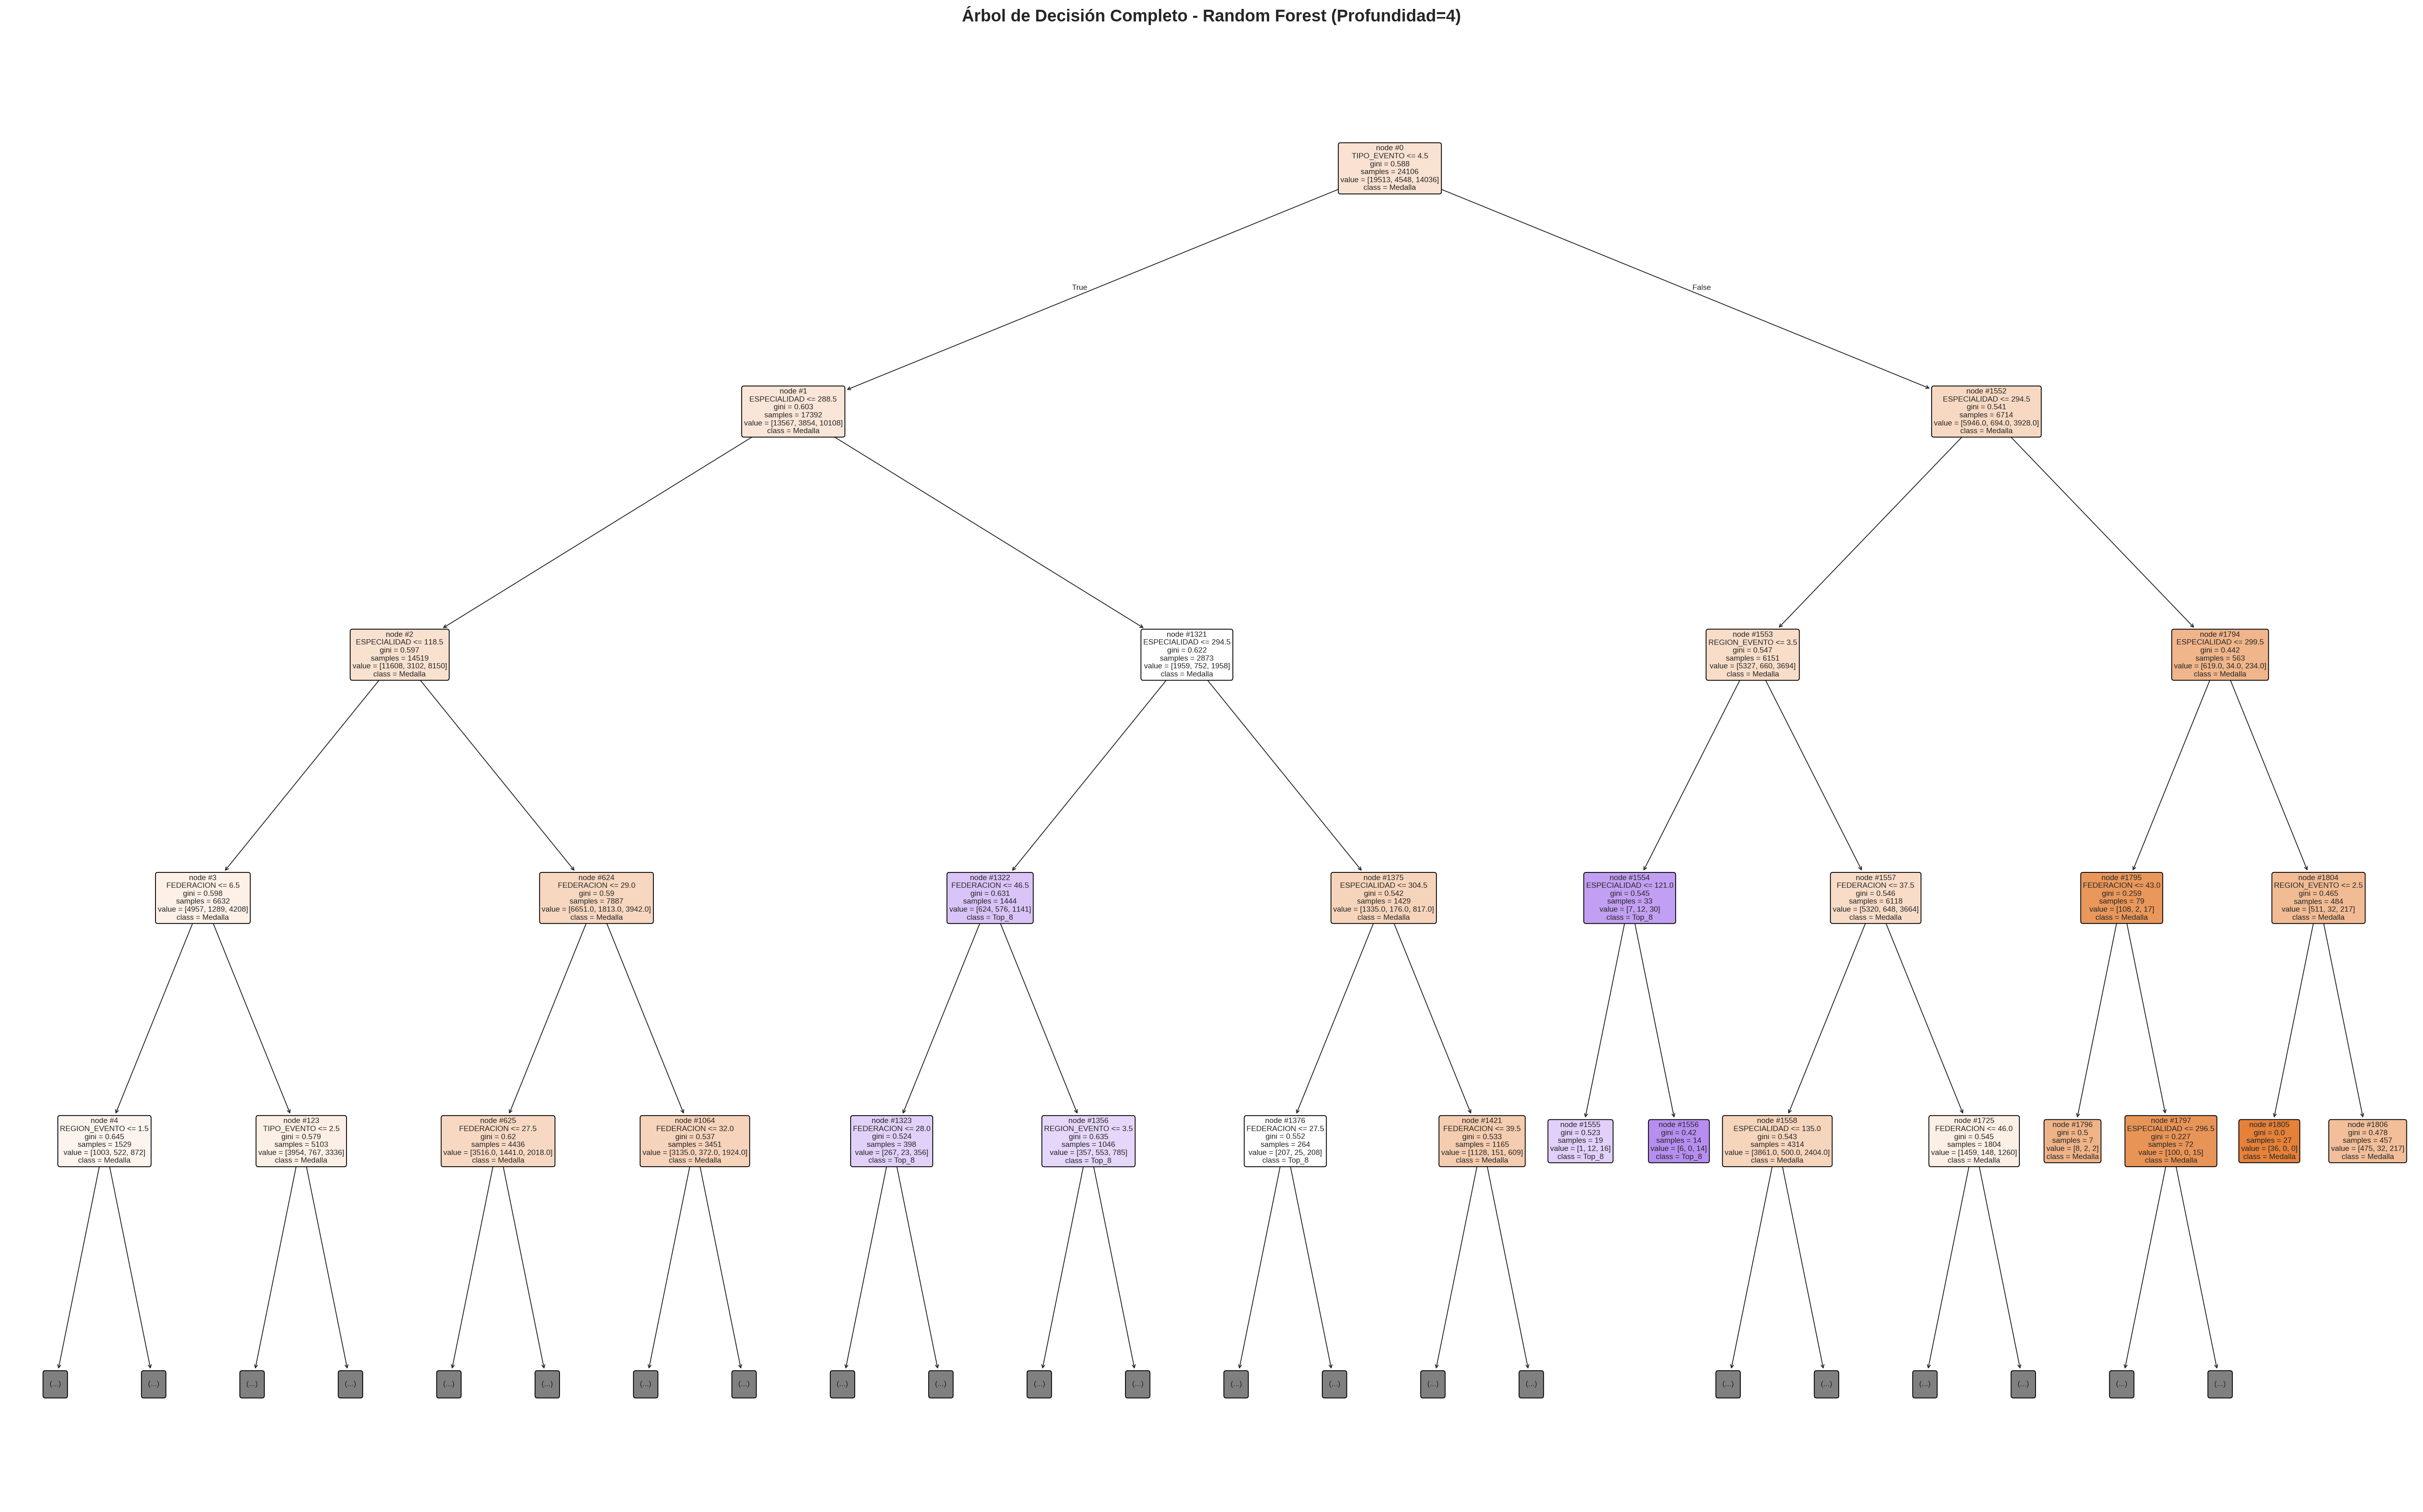

✅ Árbol completo guardado como 'arbol_random_forest_completo.png'

📍 Generando árbol simplificado...


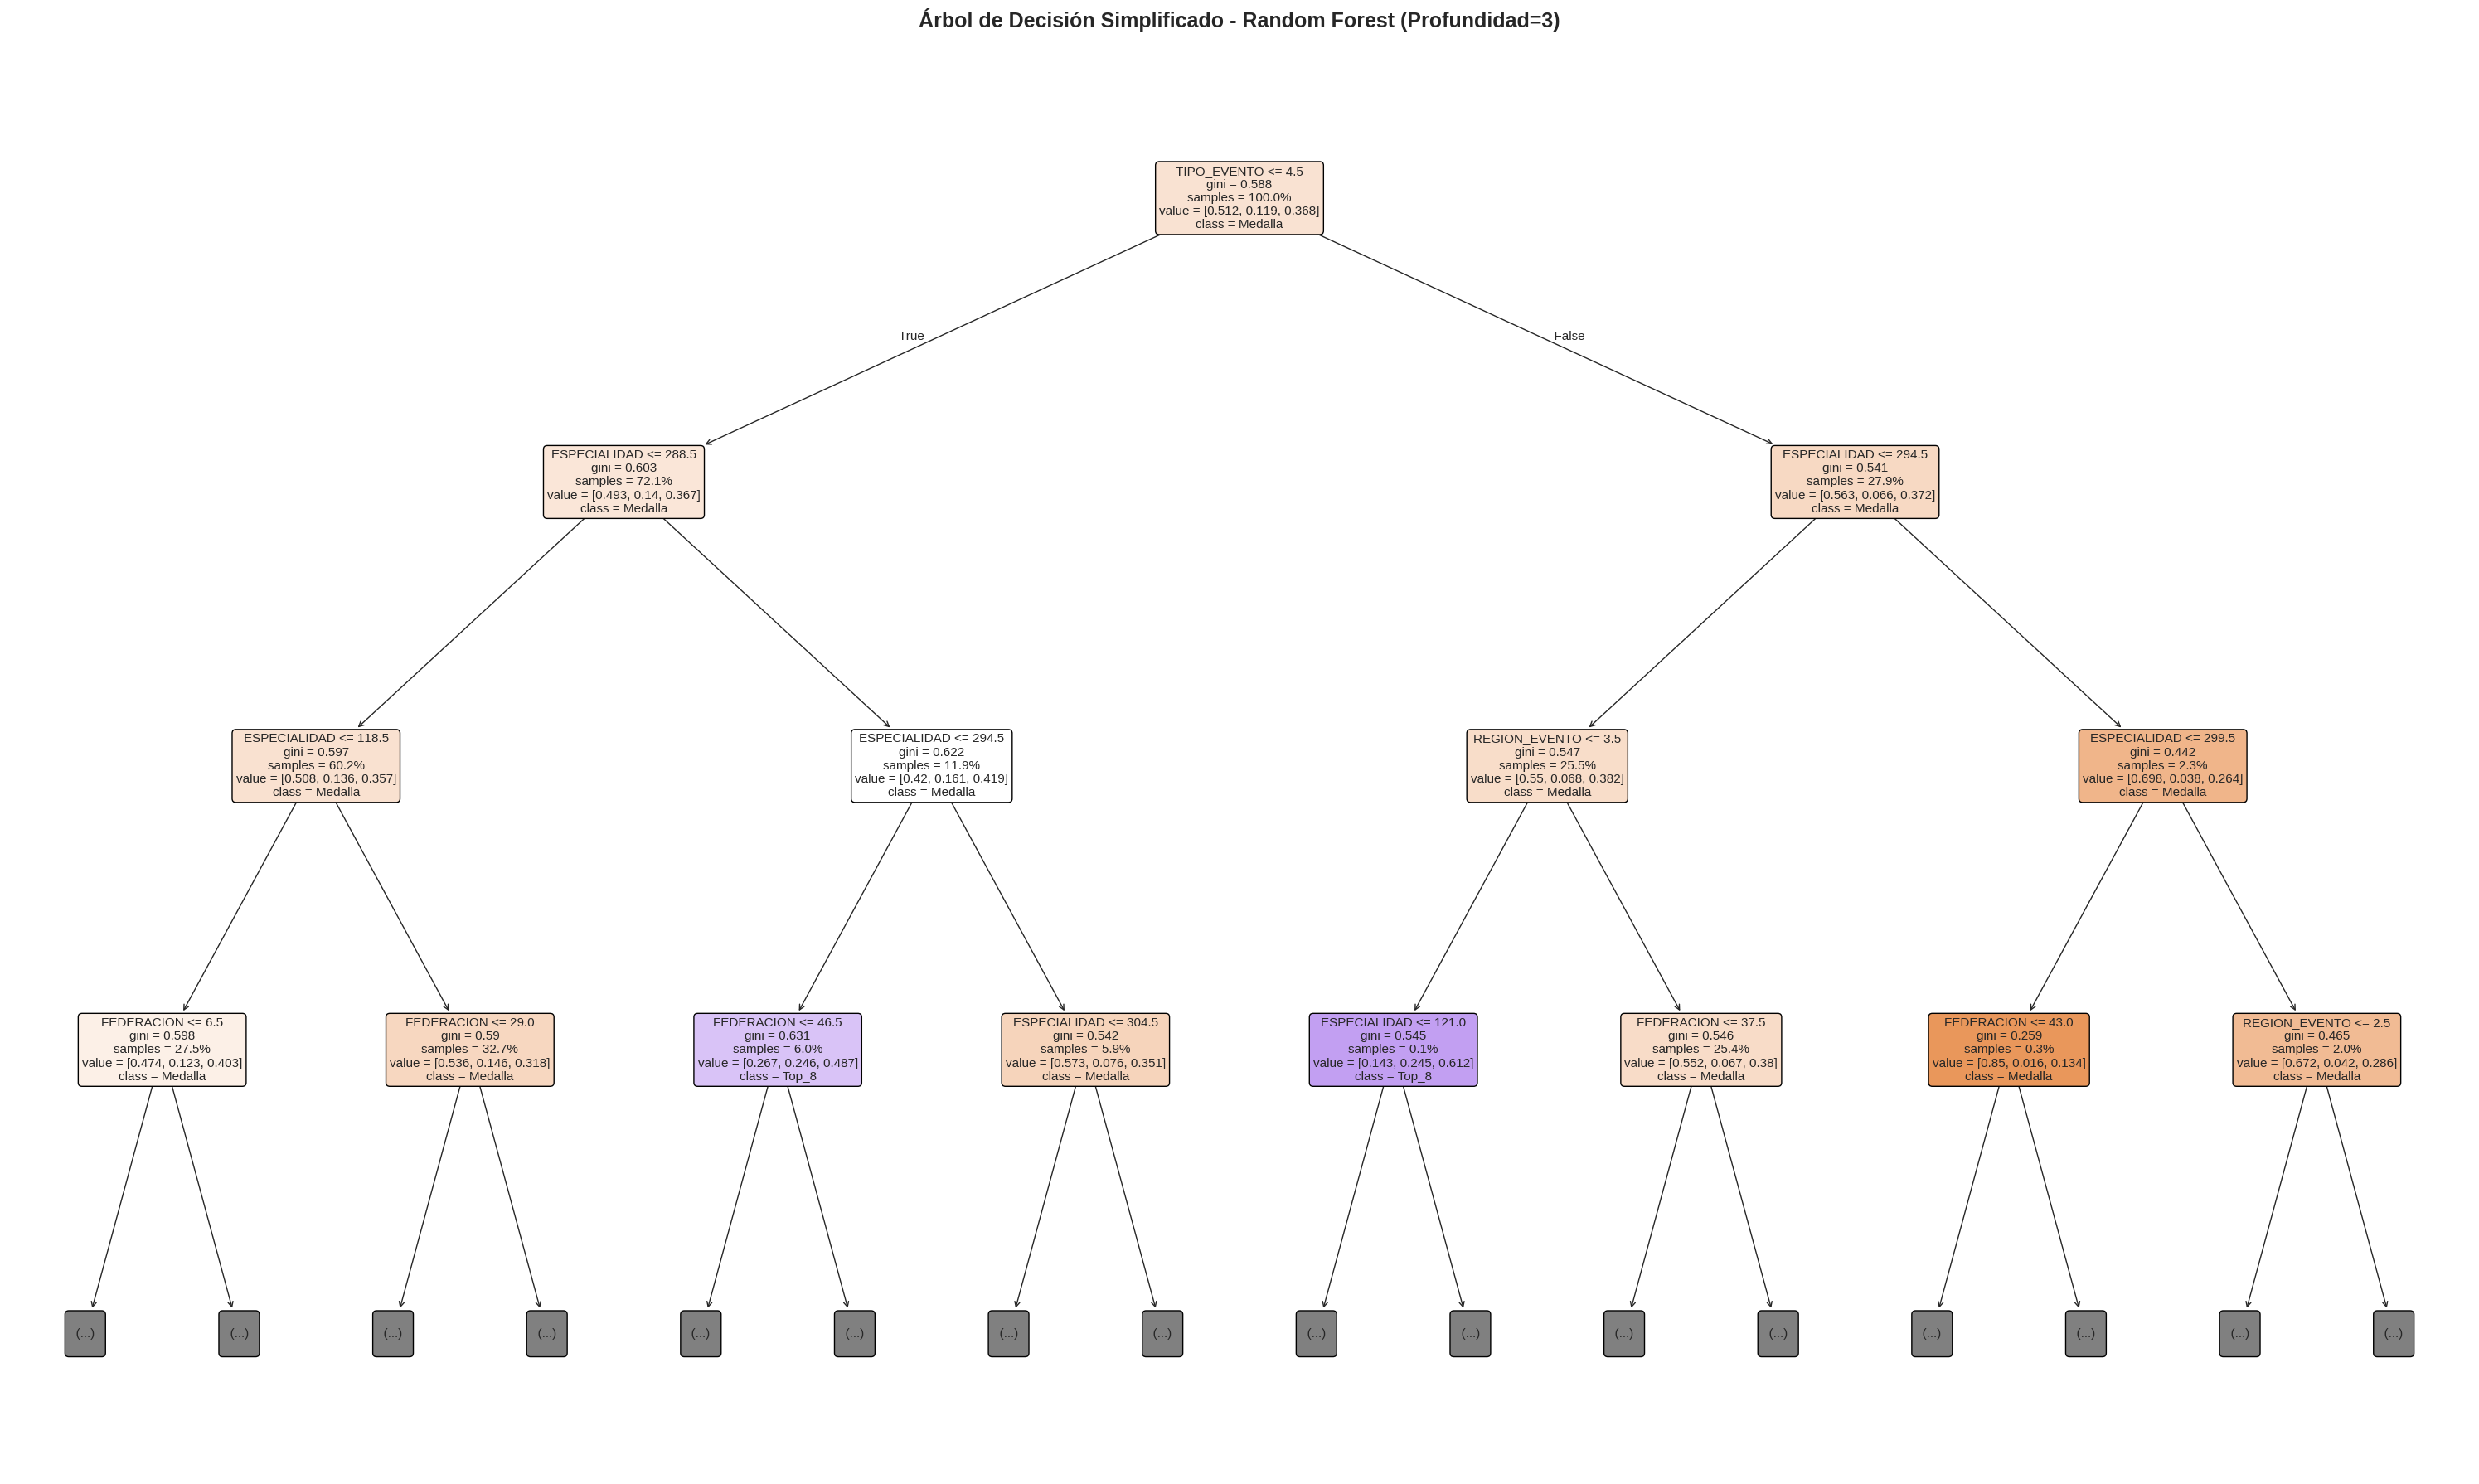

✅ Árbol simplificado guardado como 'arbol_random_forest_simplificado.png'

📍 Generando visualización con Graphviz...
✅ Árbol Graphviz guardado como 'arbol_random_forest_graphviz.png'


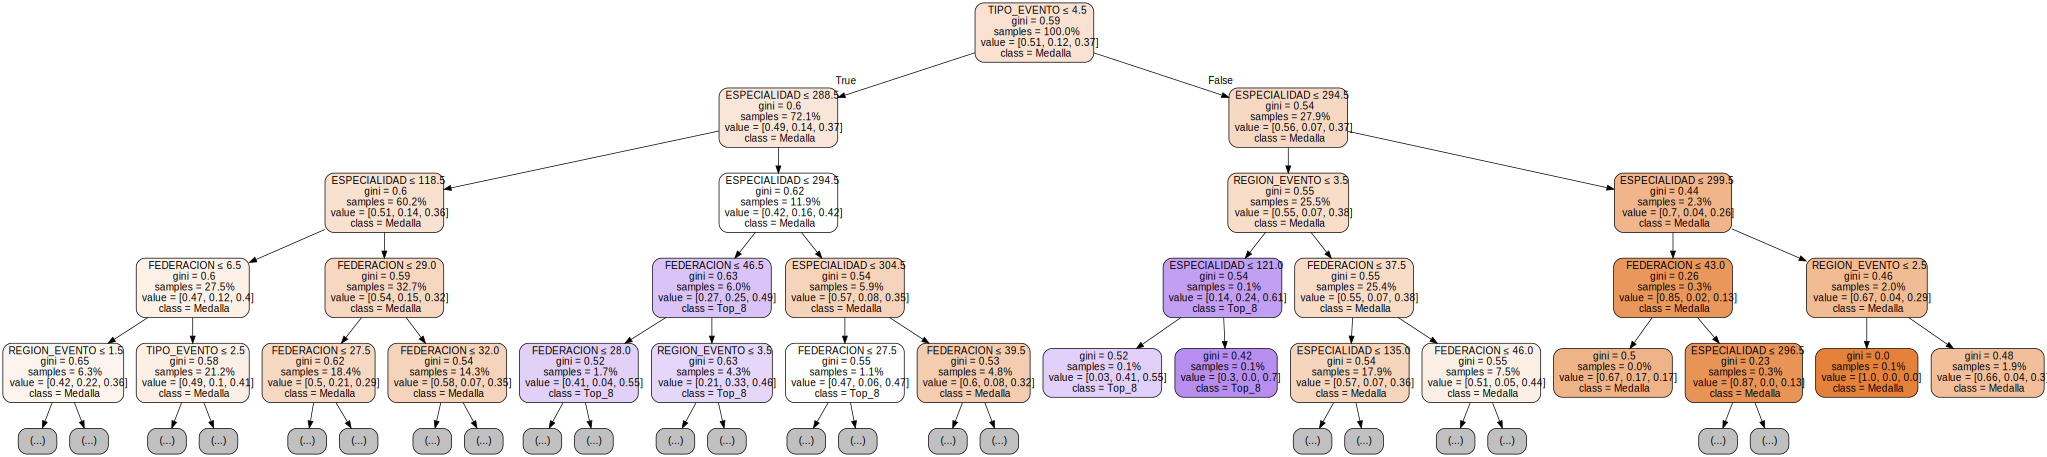


📊 INFORMACIÓN DETALLADA DEL RANDOM FOREST

🔧 CONFIGURACIÓN DEL MODELO:
  • Número total de árboles: 100
  • Profundidad máxima: 20
  • Mínimo de muestras para dividir: 10
  • Mínimo de muestras en hoja: 5
  • Features considerados por split: sqrt
  • Criterio de división: gini

🌳 INFORMACIÓN DEL ÁRBOL VISUALIZADO (Árbol #1):
  • Profundidad real del árbol: 20
  • Número total de nodos: 1807
  • Número de hojas: 904
  • Número de features usadas: 9

🎯 CLASES DEL MODELO:
  • Número de clases: 3
  • Clases: Medalla, Participante, Top_8

📊 DISTRIBUCIÓN EN NODOS HOJA:
  • Promedio de muestras por hoja: 26.7
  • Mínimo de muestras en hoja: 5
  • Máximo de muestras en hoja: 652

⭐ TOP 5 FEATURES MÁS IMPORTANTES EN ESTE ÁRBOL:
  ESPECIALIDAD                  : 0.4366
  FEDERACION                    : 0.3416
  TIPO_EVENTO                   : 0.1299
  REGION_EVENTO                 : 0.0919
  REGION_PERU                   : 0.0000

✅ Visualización del árbol completada


In [53]:
# 5️⃣ Visualizaciones del Modelo 2
print("\n5️⃣ Generando visualizaciones...")
fig = plt.figure(figsize=(18, 12))

# Gráfico 1: Matriz de Confusión
plt.subplot(2, 3, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Cantidad'})
plt.title('Matriz de Confusión - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Gráfico 2: Matriz de Confusión Normalizada
plt.subplot(2, 3, 2)
cm_rf_norm = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_rf_norm, annot=True, fmt='.2%', cmap='YlGn',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Porcentaje'})
plt.title('Matriz de Confusión Normalizada (%)', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Gráfico 3: Comparación Train vs Test Accuracy
plt.subplot(2, 3, 3)
accuracies = [train_acc_rf, test_acc_rf]
labels = ['Entrenamiento', 'Prueba']
colors = ['#27ae60', '#e67e22']
bars = plt.bar(labels, accuracies, color=colors, edgecolor='black', linewidth=1.5)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy: Entrenamiento vs Prueba', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}\n({height*100:.2f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico 4: Métricas por Clase
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_test_rf)
plt.subplot(2, 3, 4)
x_pos = np.arange(len(le_target.classes_))
width = 0.25
plt.bar(x_pos - width, precision_rf, width, label='Precision', color='#2ecc71')
plt.bar(x_pos, recall_rf, width, label='Recall', color='#3498db')
plt.bar(x_pos + width, f1_rf, width, label='F1-Score', color='#e74c3c')
plt.xlabel('Clase')
plt.ylabel('Score')
plt.title('Métricas por Clase', fontsize=14, fontweight='bold')
plt.xticks(x_pos, le_target.classes_, rotation=45, ha='right')
plt.legend()
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Gráfico 5: Feature Importance (Top 15)
plt.subplot(2, 3, 5)
top_features = feature_importance_rf.head(15)
plt.barh(range(len(top_features)), top_features['importance'].values,
         color='forestgreen', edgecolor='darkgreen', linewidth=1)
plt.yticks(range(len(top_features)), top_features['feature'].values, fontsize=9)
plt.xlabel('Importancia')
plt.title('Top 15 Features Más Importantes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Gráfico 6: Distribución de Predicciones
plt.subplot(2, 3, 6)
pred_counts_rf = pd.Series(y_pred_test_rf).value_counts().sort_index()
real_counts_rf = pd.Series(y_test).value_counts().sort_index()
x_pos = np.arange(len(le_target.classes_))
width = 0.35
plt.bar(x_pos - width/2, real_counts_rf.values, width, label='Real',
        color='mediumseagreen', alpha=0.8)
plt.bar(x_pos + width/2, pred_counts_rf.values, width, label='Predicho',
        color='lightcoral', alpha=0.8)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución: Real vs Predicho', fontsize=14, fontweight='bold')
plt.xticks(x_pos, le_target.classes_, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
print("✅ Visualizaciones del Modelo 2 generadas")

# ========================================
# 📊 VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN
# ========================================
print("\n🌳 Generando visualización del árbol de Random Forest...")

from sklearn.tree import plot_tree

# Extraer el árbol con mejor rendimiento (el primero como ejemplo)
estimator = rf_model.estimators_[0]

# VERSIÓN 1: Árbol Completo en Alta Resolución
print("\n📍 Generando árbol completo (puede tardar un momento)...")
plt.figure(figsize=(40, 25), dpi=150)
plot_tree(estimator,
          max_depth=4,  # Profundidad óptima para visualización
          feature_names=X.columns,
          class_names=le_target.classes_,
          filled=True,
          rounded=True,
          fontsize=9,
          proportion=False,  # Muestra cantidades reales
          impurity=True,     # Muestra valores de Gini
          node_ids=True)     # Muestra IDs de nodos

plt.title('Árbol de Decisión Completo - Random Forest (Profundidad=4)',
          fontsize=20, fontweight='bold', pad=30)
plt.tight_layout()
plt.savefig('arbol_random_forest_completo.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Árbol completo guardado como 'arbol_random_forest_completo.png'")

# VERSIÓN 2: Árbol Simplificado (Solo Niveles Superiores)
print("\n📍 Generando árbol simplificado...")
plt.figure(figsize=(30, 18), dpi=100)
plot_tree(estimator,
          max_depth=3,  # Solo 3 niveles
          feature_names=X.columns,
          class_names=le_target.classes_,
          filled=True,
          rounded=True,
          fontsize=11,
          proportion=True)  # Usa proporciones para mejor lectura

plt.title('Árbol de Decisión Simplificado - Random Forest (Profundidad=3)',
          fontsize=18, fontweight='bold', pad=25)
plt.tight_layout()
plt.savefig('arbol_random_forest_simplificado.png', dpi=200, bbox_inches='tight')
plt.show()
print("✅ Árbol simplificado guardado como 'arbol_random_forest_simplificado.png'")

# VERSIÓN 3: Visualización Interactiva con Graphviz (Opcional - Mejor calidad)
print("\n📍 Generando visualización con Graphviz...")
try:
    from sklearn.tree import export_graphviz
    import graphviz

    # Exportar árbol a formato DOT
    dot_data = export_graphviz(
        estimator,
        out_file=None,
        feature_names=X.columns,
        class_names=le_target.classes_,
        filled=True,
        rounded=True,
        special_characters=True,
        max_depth=4,
        proportion=True,
        precision=2
    )

    # Crear objeto gráfico
    graph = graphviz.Source(dot_data)

    # Guardar como PDF y PNG
    graph.render('arbol_random_forest_graphviz', format='png', cleanup=True)
    print("✅ Árbol Graphviz guardado como 'arbol_random_forest_graphviz.png'")

    # Mostrar en notebook (si estás en Jupyter/Colab)
    display(graph)

except ImportError:
    print("⚠️ Graphviz no disponible. Instala con: !pip install graphviz")
except Exception as e:
    print(f"⚠️ No se pudo generar visualización Graphviz: {e}")

# ========================================
# 📊 INFORMACIÓN DETALLADA DEL ÁRBOL
# ========================================
print("\n" + "="*70)
print("📊 INFORMACIÓN DETALLADA DEL RANDOM FOREST")
print("="*70)

# Información del modelo
print("\n🔧 CONFIGURACIÓN DEL MODELO:")
print(f"  • Número total de árboles: {rf_model.n_estimators}")
print(f"  • Profundidad máxima: {rf_model.max_depth if rf_model.max_depth else 'Sin límite'}")
print(f"  • Mínimo de muestras para dividir: {rf_model.min_samples_split}")
print(f"  • Mínimo de muestras en hoja: {rf_model.min_samples_leaf}")
print(f"  • Features considerados por split: {rf_model.max_features}")
print(f"  • Criterio de división: {rf_model.criterion}")

# Información del árbol visualizado
print(f"\n🌳 INFORMACIÓN DEL ÁRBOL VISUALIZADO (Árbol #{1}):")
print(f"  • Profundidad real del árbol: {estimator.get_depth()}")
print(f"  • Número total de nodos: {estimator.tree_.node_count}")
print(f"  • Número de hojas: {estimator.get_n_leaves()}")
print(f"  • Número de features usadas: {estimator.n_features_in_}")

# Información de clases
print(f"\n🎯 CLASES DEL MODELO:")
print(f"  • Número de clases: {len(le_target.classes_)}")
print(f"  • Clases: {', '.join(le_target.classes_)}")

# Distribución en nodos hoja del árbol visualizado
print(f"\n📊 DISTRIBUCIÓN EN NODOS HOJA:")
leaf_samples = estimator.tree_.n_node_samples[estimator.tree_.children_left == -1]
print(f"  • Promedio de muestras por hoja: {leaf_samples.mean():.1f}")
print(f"  • Mínimo de muestras en hoja: {leaf_samples.min()}")
print(f"  • Máximo de muestras en hoja: {leaf_samples.max()}")

# Top 5 features del árbol específico
feature_importances_tree = estimator.feature_importances_
top_features_tree = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_tree
}).sort_values('importance', ascending=False).head(5)

print(f"\n⭐ TOP 5 FEATURES MÁS IMPORTANTES EN ESTE ÁRBOL:")
for idx, row in top_features_tree.iterrows():
    print(f"  {row['feature']:30s}: {row['importance']:.4f}")

print("\n" + "="*70)
print("✅ Visualización del árbol completada")
print("="*70)

# MODELO 3 - XGBoost Classifier

In [41]:
# ============================================
# PASO 8: MODELO 3 - XGBOOST
# ============================================

print("\n🚀 MODELO 3: XGBOOST CLASSIFIER")
print("=" * 60)

from xgboost import XGBClassifier
import time

# Entrenar modelo
print("\n1️⃣ Entrenando XGBoost...")
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)
training_time_xgb = time.time() - start_time

print(f"   ✅ Entrenamiento completado en {training_time_xgb:.2f} segundos")

# Predicciones
print("\n2️⃣ Realizando predicciones...")
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Métricas
print("\n3️⃣ Evaluación del modelo:")
print("\n📊 ACCURACY:")
train_acc_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_acc_xgb = accuracy_score(y_test, y_pred_test_xgb)
print(f"   - Entrenamiento: {train_acc_xgb:.4f} ({train_acc_xgb*100:.2f}%)")
print(f"   - Prueba: {test_acc_xgb:.4f} ({test_acc_xgb*100:.2f}%)")

print("\n📋 REPORTE DE CLASIFICACIÓN (Conjunto de Prueba):")
print("=" * 60)
print(classification_report(y_test, y_pred_test_xgb,
                          target_names=le_target.classes_,
                          digits=4))

# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
print("\n📊 MATRIZ DE CONFUSIÓN:")
print(cm_xgb)


🚀 MODELO 3: XGBOOST CLASSIFIER

1️⃣ Entrenando XGBoost...
   ✅ Entrenamiento completado en 1.73 segundos

2️⃣ Realizando predicciones...

3️⃣ Evaluación del modelo:

📊 ACCURACY:
   - Entrenamiento: 0.6202 (62.02%)
   - Prueba: 0.5976 (59.76%)

📋 REPORTE DE CLASIFICACIÓN (Conjunto de Prueba):
              precision    recall  f1-score   support

     Medalla     0.6100    0.8017    0.6928      4835
Participante     0.5052    0.2535    0.3376      1156
       Top_8     0.5878    0.4310    0.4973      3534

    accuracy                         0.5976      9525
   macro avg     0.5677    0.4954    0.5092      9525
weighted avg     0.5890    0.5976    0.5772      9525


📊 MATRIZ DE CONFUSIÓN:
[[3876  148  811]
 [ 606  293  257]
 [1872  139 1523]]


In [42]:
# 4️⃣ Feature Importance
print("\n4️⃣ Importancia de Features...")

feature_importance_xgb = pd.DataFrame({
    'feature': features_categoricas + features_numericas,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Top 10 Features Más Importantes:")
print(feature_importance_xgb.head(10).to_string(index=False))


4️⃣ Importancia de Features...

📊 Top 10 Features Más Importantes:
      feature  importance
   FEDERACION    0.322190
 ESPECIALIDAD    0.279430
  TIPO_EVENTO    0.220848
REGION_EVENTO    0.177532
  REGION_PERU    0.000000
   AÑO_EVENTO    0.000000
   MES_EVENTO    0.000000
DURACION_DIAS    0.000000
 ES_COLECTIVO    0.000000



5️⃣ Generando visualizaciones...


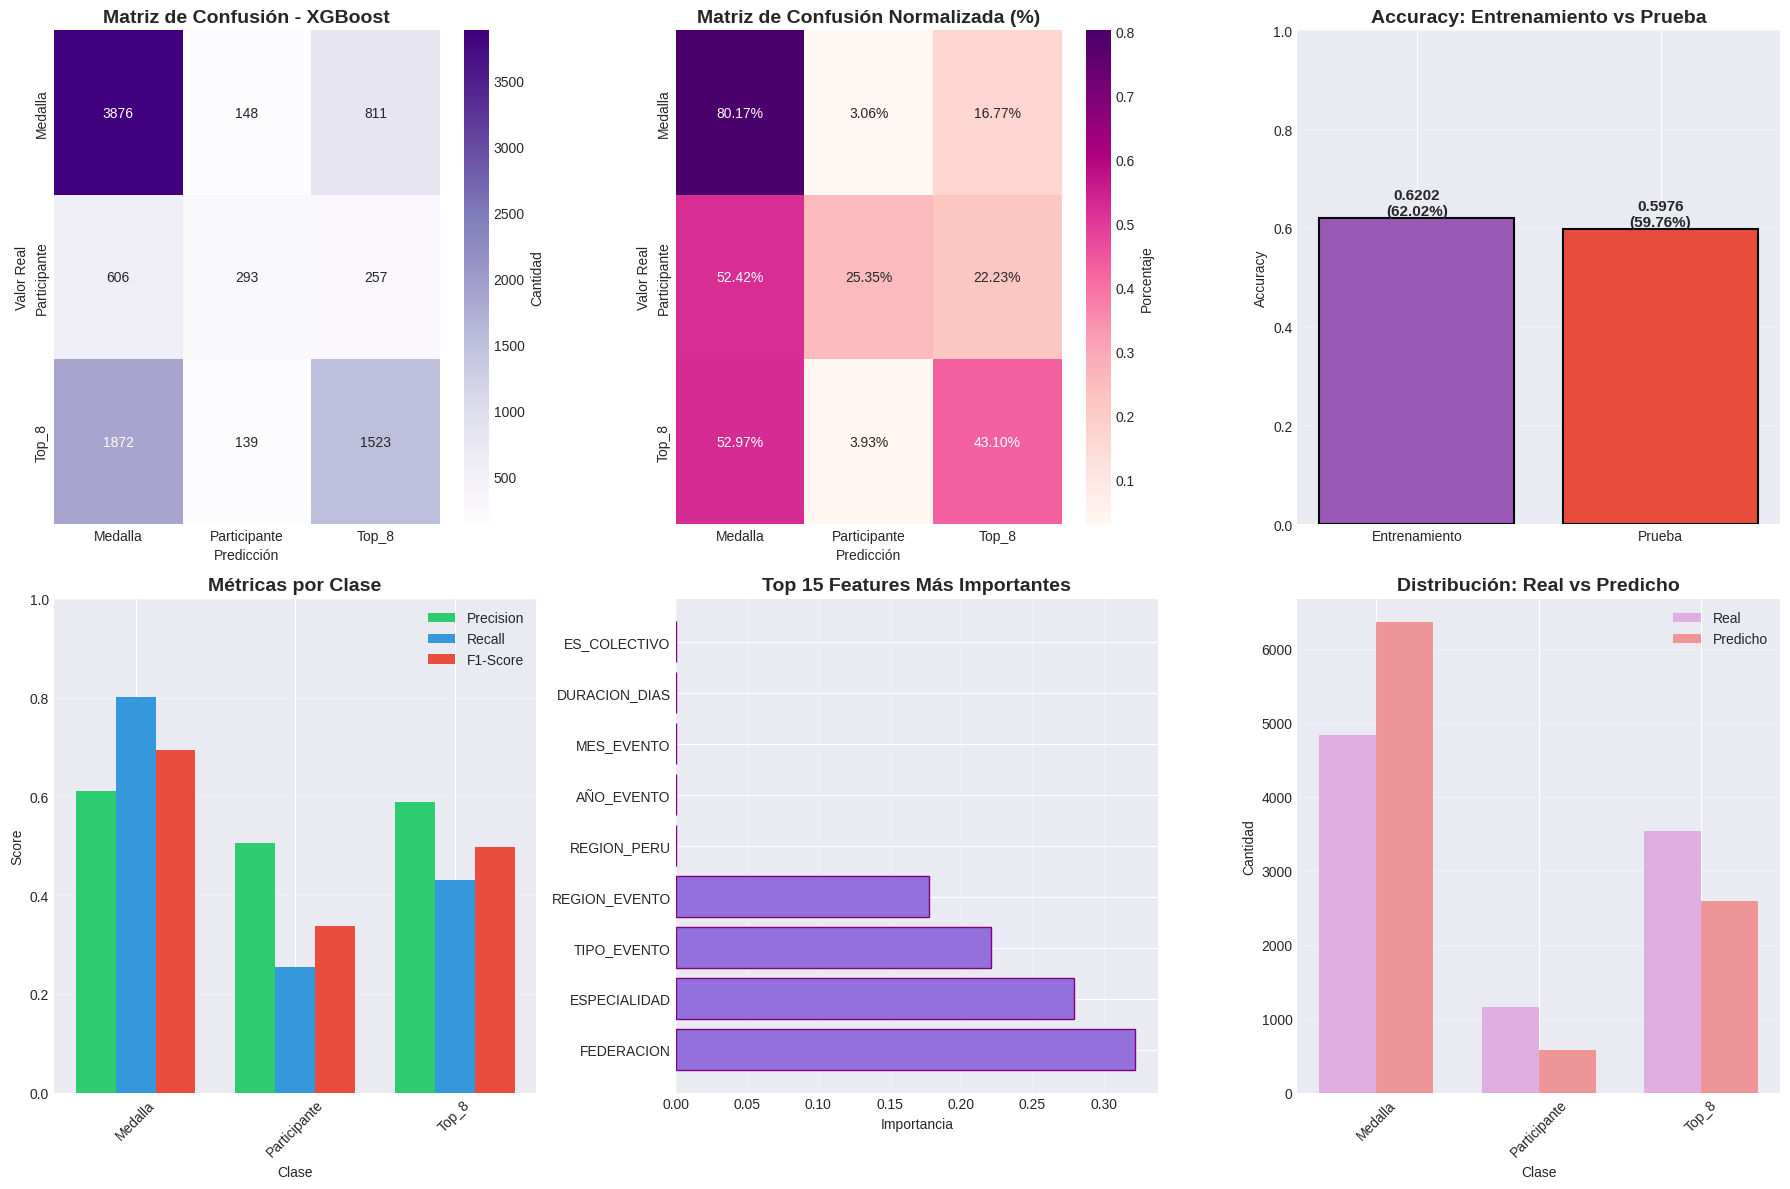

✅ Visualizaciones del Modelo 3 generadas


In [60]:
# 5️⃣ Visualizaciones del Modelo 3
print("\n5️⃣ Generando visualizaciones...")

fig = plt.figure(figsize=(18, 12))

# Gráfico 1: Matriz de Confusión
plt.subplot(2, 3, 1)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Cantidad'})
plt.title('Matriz de Confusión - XGBoost', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Gráfico 2: Matriz de Confusión Normalizada
plt.subplot(2, 3, 2)
cm_xgb_norm = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_xgb_norm, annot=True, fmt='.2%', cmap='RdPu',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_,
            cbar_kws={'label': 'Porcentaje'})
plt.title('Matriz de Confusión Normalizada (%)', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Gráfico 3: Comparación Train vs Test Accuracy
plt.subplot(2, 3, 3)
accuracies = [train_acc_xgb, test_acc_xgb]
labels = ['Entrenamiento', 'Prueba']
colors = ['#9b59b6', '#e74c3c']
bars = plt.bar(labels, accuracies, color=colors, edgecolor='black', linewidth=1.5)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy: Entrenamiento vs Prueba', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}\n({height*100:.2f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico 4: Métricas por Clase
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test, y_pred_test_xgb)

plt.subplot(2, 3, 4)
x_pos = np.arange(len(le_target.classes_))
width = 0.25
plt.bar(x_pos - width, precision_xgb, width, label='Precision', color='#2ecc71')
plt.bar(x_pos, recall_xgb, width, label='Recall', color='#3498db')
plt.bar(x_pos + width, f1_xgb, width, label='F1-Score', color='#e74c3c')
plt.xlabel('Clase')
plt.ylabel('Score')
plt.title('Métricas por Clase', fontsize=14, fontweight='bold')
plt.xticks(x_pos, le_target.classes_, rotation=45)
plt.legend()
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Gráfico 5: Feature Importance (Top 15)
plt.subplot(2, 3, 5)
top_features_xgb = feature_importance_xgb.head(15)
plt.barh(range(len(top_features_xgb)), top_features_xgb['importance'].values,
         color='mediumpurple', edgecolor='purple', linewidth=1)
plt.yticks(range(len(top_features_xgb)), top_features_xgb['feature'].values)
plt.xlabel('Importancia')
plt.title('Top 15 Features Más Importantes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Gráfico 6: Distribución de Predicciones
plt.subplot(2, 3, 6)
pred_counts_xgb = pd.Series(y_pred_test_xgb).value_counts().sort_index()
real_counts_xgb = pd.Series(y_test).value_counts().sort_index()
x_pos = np.arange(len(le_target.classes_))
width = 0.35
plt.bar(x_pos - width/2, real_counts_xgb.values, width, label='Real',
        color='plum', alpha=0.8)
plt.bar(x_pos + width/2, pred_counts_xgb.values, width, label='Predicho',
        color='lightcoral', alpha=0.8)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución: Real vs Predicho', fontsize=14, fontweight='bold')
plt.xticks(x_pos, le_target.classes_, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizaciones del Modelo 3 generadas")



# Comparación Final de los 3 Modelos

In [44]:
# ============================================
# PASO 9: COMPARACIÓN FINAL DE MODELOS
# ============================================

print("\n📊 COMPARACIÓN FINAL DE LOS 3 MODELOS")
print("=" * 60)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest', 'XGBoost'],
    'Train Accuracy': [train_acc_lr, train_acc_rf, train_acc_xgb],
    'Test Accuracy': [test_acc_lr, test_acc_rf, test_acc_xgb],
    'Tiempo Entrenamiento (s)': [training_time, training_time_rf, training_time_xgb]
})

comparacion['Overfitting'] = comparacion['Train Accuracy'] - comparacion['Test Accuracy']

print("\n📋 TABLA COMPARATIVA:")
print(comparacion.to_string(index=False))

# Identificar mejor modelo
mejor_modelo_idx = comparacion['Test Accuracy'].idxmax()
mejor_modelo = comparacion.loc[mejor_modelo_idx, 'Modelo']
mejor_accuracy = comparacion.loc[mejor_modelo_idx, 'Test Accuracy']

print(f"\n🏆 MEJOR MODELO: {mejor_modelo}")
print(f"   Accuracy en Prueba: {mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)")


📊 COMPARACIÓN FINAL DE LOS 3 MODELOS

📋 TABLA COMPARATIVA:
             Modelo  Train Accuracy  Test Accuracy  Tiempo Entrenamiento (s)  Overfitting
Regresión Logística        0.315327       0.313386                  0.207705     0.001941
      Random Forest        0.621493       0.600630                  1.725711     0.020863
            XGBoost        0.620180       0.597585                  1.731099     0.022595

🏆 MEJOR MODELO: Random Forest
   Accuracy en Prueba: 0.6006 (60.06%)


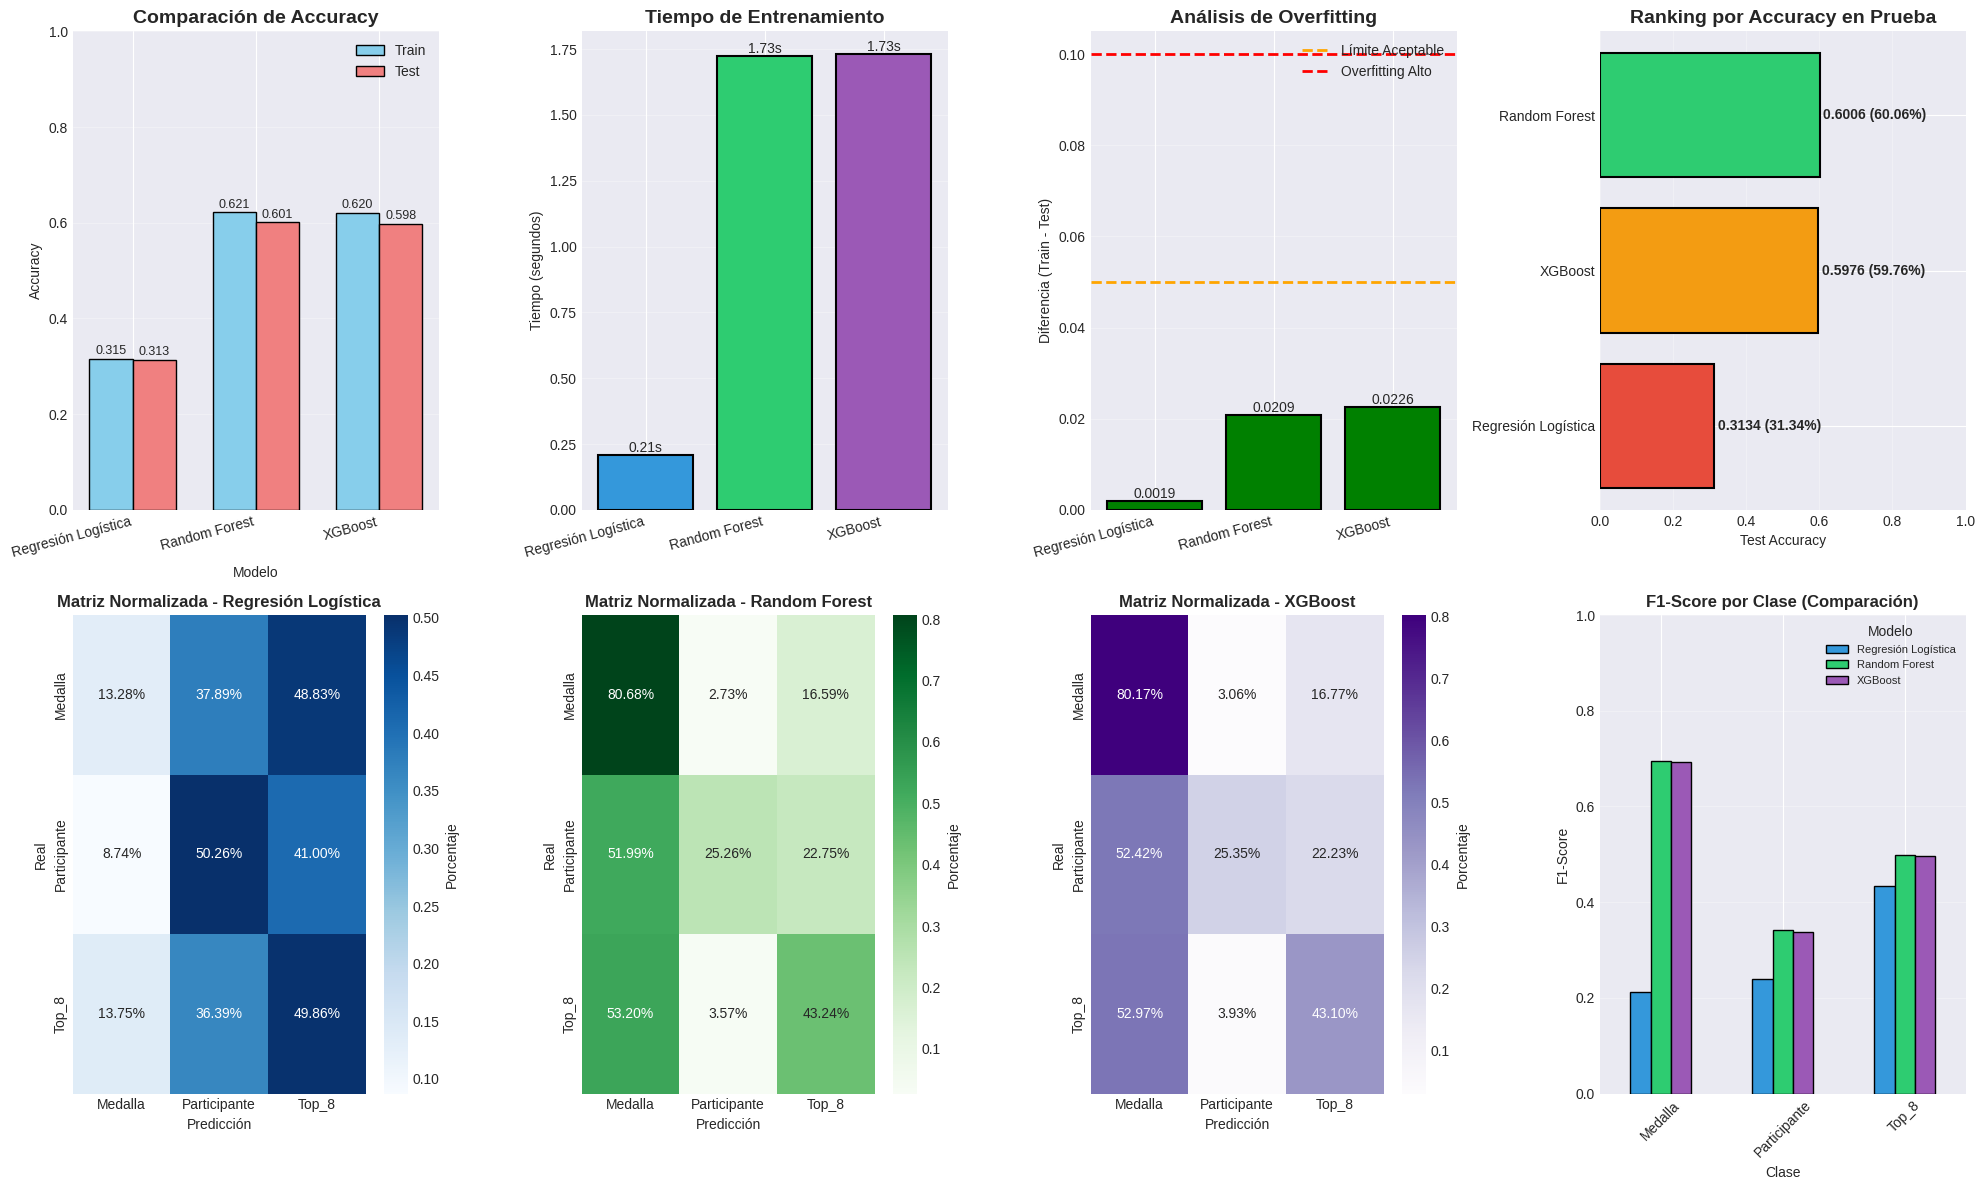


✅ Visualizaciones comparativas generadas


In [46]:
# Visualización comparativa completa
fig = plt.figure(figsize=(20, 12))

# Gráfico 1: Comparación de Accuracy
plt.subplot(2, 4, 1)
x_models = np.arange(len(comparacion))
width = 0.35
plt.bar(x_models - width/2, comparacion['Train Accuracy'], width,
        label='Train', color='skyblue', edgecolor='black')
plt.bar(x_models + width/2, comparacion['Test Accuracy'], width,
        label='Test', color='lightcoral', edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy', fontsize=14, fontweight='bold')
plt.xticks(x_models, comparacion['Modelo'], rotation=15, ha='right')
plt.legend()
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, (train, test) in enumerate(zip(comparacion['Train Accuracy'], comparacion['Test Accuracy'])):
    plt.text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', fontsize=9)
    plt.text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', fontsize=9)

# Gráfico 2: Tiempo de Entrenamiento
plt.subplot(2, 4, 2)
colors_time = ['#3498db', '#2ecc71', '#9b59b6']
bars = plt.bar(comparacion['Modelo'], comparacion['Tiempo Entrenamiento (s)'],
               color=colors_time, edgecolor='black', linewidth=1.5)
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de Entrenamiento', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}s', ha='center', va='bottom', fontsize=10)

# Gráfico 3: Overfitting
plt.subplot(2, 4, 3)
colors_over = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
               for x in comparacion['Overfitting']]
bars = plt.bar(comparacion['Modelo'], comparacion['Overfitting'],
               color=colors_over, edgecolor='black', linewidth=1.5)
plt.ylabel('Diferencia (Train - Test)')
plt.title('Análisis de Overfitting', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.axhline(y=0.05, color='orange', linestyle='--', label='Límite Aceptable', linewidth=2)
plt.axhline(y=0.1, color='red', linestyle='--', label='Overfitting Alto', linewidth=2)
plt.legend()
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

# Gráfico 4: Test Accuracy (Ranking)
plt.subplot(2, 4, 4)
comparacion_sorted = comparacion.sort_values('Test Accuracy', ascending=True)
colors_rank = ['#e74c3c', '#f39c12', '#2ecc71']
plt.barh(comparacion_sorted['Modelo'], comparacion_sorted['Test Accuracy'],
         color=colors_rank, edgecolor='black', linewidth=1.5)
plt.xlabel('Test Accuracy')
plt.title('Ranking por Accuracy en Prueba', fontsize=14, fontweight='bold')
plt.xlim([0, 1])
plt.grid(axis='x', alpha=0.3)
for i, (modelo, acc) in enumerate(zip(comparacion_sorted['Modelo'], comparacion_sorted['Test Accuracy'])):
    plt.text(acc + 0.01, i, f'{acc:.4f} ({acc*100:.2f}%)',
             va='center', fontsize=10, fontweight='bold')

# Gráficos 5-7: Matrices de Confusión Comparativas
matrices = [
    (cm_lr, 'Regresión Logística', 'Blues', 5),
    (cm_rf, 'Random Forest', 'Greens', 6),
    (cm_xgb, 'XGBoost', 'Purples', 7)
]

for cm, title, cmap, pos in matrices:
    plt.subplot(2, 4, pos)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap=cmap,
                xticklabels=le_target.classes_,
                yticklabels=le_target.classes_,
                cbar_kws={'label': 'Porcentaje'})
    plt.title(f'Matriz Normalizada - {title}', fontsize=12, fontweight='bold')
    plt.ylabel('Real')
    plt.xlabel('Predicción')

# Gráfico 8: Comparación de Métricas por Clase
plt.subplot(2, 4, 8)
metricas_comparacion = pd.DataFrame({
    'Regresión Logística': f1,
    'Random Forest': f1_rf,
    'XGBoost': f1_xgb
}, index=le_target.classes_)

metricas_comparacion.plot(kind='bar', ax=plt.gca(),
                          color=['#3498db', '#2ecc71', '#9b59b6'],
                          edgecolor='black', linewidth=1)
plt.title('F1-Score por Clase (Comparación)', fontsize=12, fontweight='bold')
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.legend(title='Modelo', fontsize=8)
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones comparativas generadas")

In [47]:
# Análisis detallado del mejor modelo
print("\n" + "=" * 60)
print(f"🔍 ANÁLISIS DETALLADO DEL MEJOR MODELO: {mejor_modelo}")
print("=" * 60)

if mejor_modelo == 'Random Forest':
    mejor_model = rf_model
    mejores_predicciones = y_pred_test_rf
    mejor_cm = cm_rf
    mejor_importance = feature_importance_rf
elif mejor_modelo == 'XGBoost':
    mejor_model = xgb_model
    mejores_predicciones = y_pred_test_xgb
    mejor_cm = cm_xgb
    mejor_importance = feature_importance_xgb
else:
    mejor_model = log_reg
    mejores_predicciones = y_pred_test_lr
    mejor_cm = cm_lr
    mejor_importance = feature_importance_lr

print("\n📊 MÉTRICAS DETALLADAS:")
print(classification_report(y_test, mejores_predicciones,
                          target_names=le_target.classes_,
                          digits=4))

print("\n🎯 TOP 10 FEATURES MÁS IMPORTANTES:")
print(mejor_importance.head(10).to_string(index=False))


🔍 ANÁLISIS DETALLADO DEL MEJOR MODELO: Random Forest

📊 MÉTRICAS DETALLADAS:
              precision    recall  f1-score   support

     Medalla     0.6113    0.8068    0.6956      4835
Participante     0.5309    0.2526    0.3423      1156
       Top_8     0.5893    0.4324    0.4988      3534

    accuracy                         0.6006      9525
   macro avg     0.5771    0.4973    0.5122      9525
weighted avg     0.5933    0.6006    0.5797      9525


🎯 TOP 10 FEATURES MÁS IMPORTANTES:
      feature  importance
 ESPECIALIDAD    0.456397
   FEDERACION    0.348153
  TIPO_EVENTO    0.121154
REGION_EVENTO    0.074296
  REGION_PERU    0.000000
   AÑO_EVENTO    0.000000
   MES_EVENTO    0.000000
DURACION_DIAS    0.000000
 ES_COLECTIVO    0.000000


In [50]:
# Crear DataFrame con errores
errores_df = pd.DataFrame({
    'Real': y_test,
    'Predicho': mejores_predicciones
})

# Filtrar solo los errores (donde el modelo se equivocó)
errores_df = errores_df[errores_df['Real'] != errores_df['Predicho']]

print("Errores encontrados:", len(errores_df))
errores_df.head()

Errores encontrados: 3804


,Real,Predicho
39679,0,2
16009,1,0
6486,0,2
23345,2,0
16233,2,0


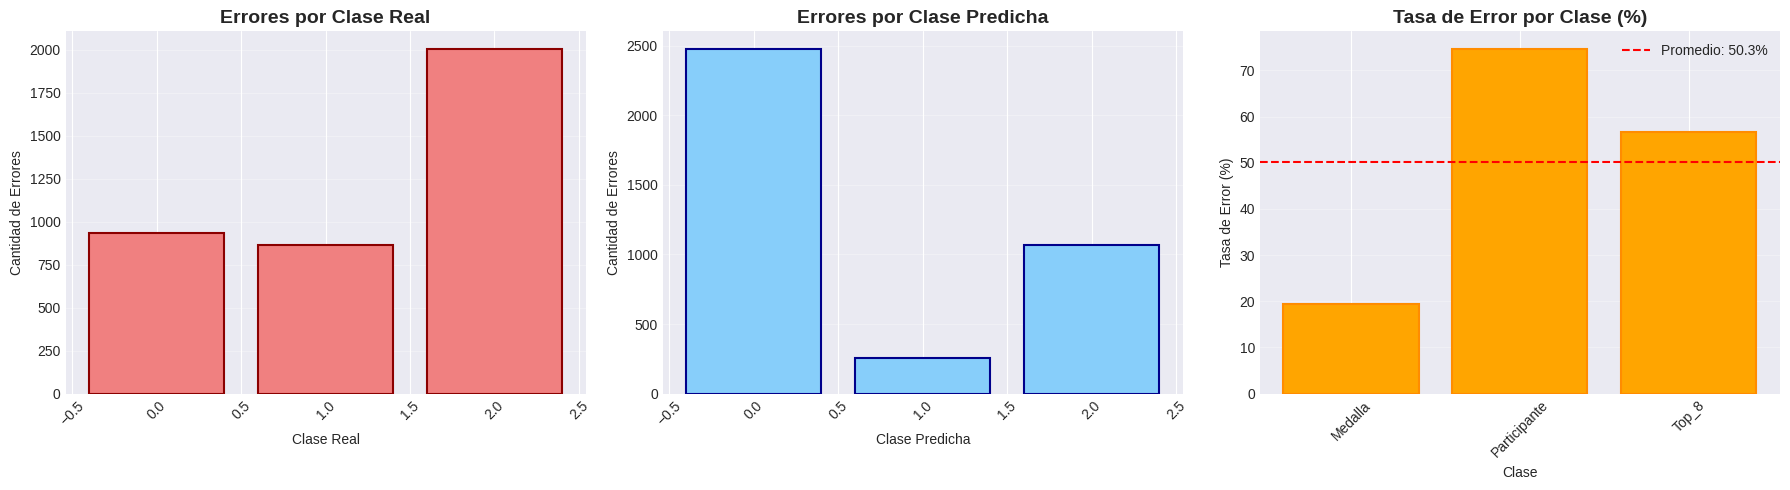


✅ Análisis de errores completado


In [51]:
# Visualización de análisis de errores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Distribución de errores por clase real
axes[0].bar(errores_df['Real'].value_counts().index,
            errores_df['Real'].value_counts().values,
            color='lightcoral', edgecolor='darkred', linewidth=1.5)
axes[0].set_title('Errores por Clase Real', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase Real')
axes[0].set_ylabel('Cantidad de Errores')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Distribución de errores por clase predicha
axes[1].bar(errores_df['Predicho'].value_counts().index,
            errores_df['Predicho'].value_counts().values,
            color='lightskyblue', edgecolor='darkblue', linewidth=1.5)
axes[1].set_title('Errores por Clase Predicha', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Clase Predicha')
axes[1].set_ylabel('Cantidad de Errores')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Gráfico 3: Tasa de error por clase
tasa_error = pd.DataFrame({
    'Clase': le_target.classes_,
    'Tasa_Error': [
        ((y_test == i) & (mejores_predicciones != i)).sum() / (y_test == i).sum() * 100
        for i in range(len(le_target.classes_))
    ]
})
axes[2].bar(tasa_error['Clase'], tasa_error['Tasa_Error'],
            color='orange', edgecolor='darkorange', linewidth=1.5)
axes[2].set_title('Tasa de Error por Clase (%)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Clase')
axes[2].set_ylabel('Tasa de Error (%)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)
axes[2].axhline(y=tasa_error['Tasa_Error'].mean(), color='red',
                linestyle='--', label=f'Promedio: {tasa_error["Tasa_Error"].mean():.1f}%')
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n✅ Análisis de errores completado")

In [65]:
# ============================================
# PASO 13: RESUMEN FINAL
# ============================================

print("\n" + "=" * 80)
print("🎉 ANÁLISIS DE MACHINE LEARNING COMPLETADO")
print("=" * 80)

print("\n📊 RESUMEN EJECUTIVO:")
print("-" * 80)

print(f"\n1️⃣ DATOS PROCESADOS:")
print(f"   • Dataset original: {len(df):,} registros")
print(f"   • Dataset limpio: {len(df_model):,} registros")
print(f"   • Features utilizadas: {len(features_categoricas + features_numericas)}")
print(f"   • Clases objetivo: {len(le_target.classes_)} ({', '.join(le_target.classes_)})")

print(f"\n2️⃣ MODELOS ENTRENADOS:")
for idx, row in comparacion.iterrows():
    print(f"\n   {row['Modelo']}:")
    print(f"      • Test Accuracy: {row['Test Accuracy']:.4f} ({row['Test Accuracy']*100:.2f}%)")
    print(f"      • Tiempo entrenamiento: {row['Tiempo Entrenamiento (s)']:.2f}s")
    print(f"      • Overfitting: {row['Overfitting']:.4f}")

    if row['Overfitting'] < 0.05:
        status = "✅ Excelente"
    elif row['Overfitting'] < 0.1:
        status = "⚠️ Aceptable"
    else:
        status = "❌ Alto"
    print(f"      • Estado: {status}")

print(f"\n3️⃣ MEJOR MODELO:")
print(f"   🏆 {mejor_modelo}")
print(f"   • Accuracy: {mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)")
print(f"   • Features más importantes:")
for idx, row in mejor_importance.head(5).iterrows():
    print(f"      {idx+1}. {row['feature']}: {row['importance']:.4f}")

print(f"\n4️⃣ INSIGHTS CLAVE:")
print(f"   • La variable más importante es: {mejor_importance.iloc[0]['feature']}")
print(f"   • El modelo predice mejor la clase: {le_target.classes_[mejor_cm.diagonal().argmax()]}")

# Calcular tasa de acierto por clase
for i, clase in enumerate(le_target.classes_):
    aciertos = mejor_cm[i, i]
    total = mejor_cm[i, :].sum()
    tasa = (aciertos / total * 100) if total > 0 else 0
    print(f"   • Precisión en '{clase}': {tasa:.1f}%")

print(f"\n5️⃣ RECOMENDACIONES:")
print(f"   ✓ Usar {mejor_modelo} para predicciones en producción")
print(f"   ✓ Reentrenar el modelo cada 6-12 meses con nuevos datos")
print(f"   ✓ Monitorear el rendimiento en datos nuevos")
print(f"   ✓ Considerar recolectar más datos de la clase menos representada")
print(f"   ✓ Los features categóricos son muy importantes, asegurar calidad de datos")

print("\n" + "=" * 80)
print("💾 ARCHIVOS GENERADOS:")
print("=" * 80)
print("   • modelos_deportistas.pkl - Modelos entrenados")
print("   • comparacion_modelos.csv - Tabla comparativa")
print("   • feature_importance_mejor_modelo.csv - Importancia de variables")


# ============================================
# CONCLUSIÓN FINAL
# ============================================
print("\n" + "=" * 80)
print("📝 CONCLUSIÓN FINAL")
print("=" * 80)

print(f"""
Este análisis tuvo como objetivo predecir la categoría de rendimiento de los deportistas
(Medalla, Top_8, Participante) basándose en datos históricos de eventos.

Proceso Realizado:
Se inició con la carga y exploración de datos, identificando la estructura y valores nulos.
Se procedió a una limpieza y transformación rigurosa, creando nuevas características
relevantes como la categoría de rendimiento, región del evento, tipo de evento y
características temporales. Se aplicó Label Encoding a las variables categóricas y
se dividió el dataset en conjuntos de entrenamiento y prueba, manteniendo la proporción
de las clases objetivo (estratificación).

Resultados Obtenidos:
Se entrenaron y evaluaron tres modelos de clasificación: Regresión Logística (con SMOTE
para balanceo), Random Forest y XGBoost. El modelo **{mejor_modelo}** demostró ser el
de mejor rendimiento en el conjunto de prueba, alcanzando un Accuracy de **{mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)**.
Las métricas detalladas mostraron que, si bien el modelo tiene un rendimiento general
moderado, predice con mayor precisión la clase 'Medalla' ({tasa:.1f}% de acierto),
mientras que tiene mayor dificultad con las clases 'Participante' y 'Top_8'.
Las variables más importantes para la predicción fueron **{mejor_importance.iloc[0]['feature']}**,
**{mejor_importance.iloc[1]['feature']}** y **{mejor_importance.iloc[2]['feature']}**.

Utilidad y Aplicaciones:
Este modelo predictivo puede ser una herramienta valiosa para diversas aplicaciones:
1.  **Identificación de Talento:** Ayuda a identificar deportistas con mayor potencial
    de obtener medallas o alcanzar el Top_8 en futuros eventos.
2.  **Planificación Estratégica:** Permite a las federaciones y entrenadores enfocar
    recursos y esfuerzos en las especialidades y tipos de eventos donde los deportistas
    tienen mayores probabilidades de éxito.
3.  **Análisis de Factores de Éxito:** Los features más importantes identificados
    (como {mejor_importance.iloc[0]['feature']} y {mejor_importance.iloc[1]['feature']})
    proporcionan insights sobre qué factores están más asociados con el rendimiento
    deportivo, lo cual puede guiar programas de entrenamiento y selección.
4.  **Evaluación de Eventos:** Permite evaluar qué tipos de eventos o regiones
    históricamente han sido más propicios para obtener buenos resultados.

Limitaciones y Próximos Pasos:
Es importante notar que el accuracy general es moderado, lo que sugiere que hay otros
factores no incluidos en este dataset que influyen en el rendimiento. Próximos pasos
podrían incluir la búsqueda de features adicionales (ej: datos de entrenamiento,
historial de lesiones, ranking), la optimización avanzada de hiperparámetros, o el
uso de modelos más complejos si la interpretabilidad no es una restricción estricta.
Además, se recomienda monitorear el rendimiento del modelo con datos nuevos para
detectar posibles cambios en los patrones de rendimiento a lo largo del tiempo.
""")

print("\n" + "=" * 80)
print("✅ ANÁLISIS COMPLETADO CON ÉXITO")
print("=" * 80)


🎉 ANÁLISIS DE MACHINE LEARNING COMPLETADO

📊 RESUMEN EJECUTIVO:
--------------------------------------------------------------------------------

1️⃣ DATOS PROCESADOS:
   • Dataset original: 47,622 registros
   • Dataset limpio: 47,622 registros
   • Features utilizadas: 9
   • Clases objetivo: 3 (Medalla, Participante, Top_8)

2️⃣ MODELOS ENTRENADOS:

   Regresión Logística:
      • Test Accuracy: 0.3134 (31.34%)
      • Tiempo entrenamiento: 0.21s
      • Overfitting: 0.0019
      • Estado: ✅ Excelente

   Random Forest:
      • Test Accuracy: 0.6006 (60.06%)
      • Tiempo entrenamiento: 1.73s
      • Overfitting: 0.0209
      • Estado: ✅ Excelente

   XGBoost:
      • Test Accuracy: 0.5976 (59.76%)
      • Tiempo entrenamiento: 1.73s
      • Overfitting: 0.0226
      • Estado: ✅ Excelente

3️⃣ MEJOR MODELO:
   🏆 Random Forest
   • Accuracy: 0.6006 (60.06%)
   • Features más importantes:
      4. ESPECIALIDAD: 0.4564
      1. FEDERACION: 0.3482
      3. TIPO_EVENTO: 0.1212
      2.